# Backwards Generated Data

Until now I have used the model to infere the bias of graders and the true score of a handin.
In this note book I will use the model and its distributions to generate observed data and see if the model can infere the same distributions.
The generated observed data will be in the continues range [0,1].

Later I will try to apply some "noise" by generate observed data and "discretize" the data into the bins 
0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1

So the value 0.54 will be set to 0.5 and 8.79 will be set to 0.9.
After applying the noice i will see if the model can still infere the same distributions as the data was generated from

Motivation:
These two task will validate the model to see if the genrated oberseved data makes sense and that the model does it to the scenario

In [49]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from collections import defaultdict
import pymc as pm
# Add the application folder to the path
import sys
sys.path.insert(0,'../Peergrade/peergrade/')
import application.model as data_model
from pymc.Matplot import plot as mcplot
import numpy as np
from matplotlib import pyplot as plt
import json
from pymongo import MongoClient
import pymongo
from bson.objectid import ObjectId
import random

# Real data

In order to see if the generated data looks like the real data we can start to plot the origianl data and later the generated data from the model.

In [41]:
def user_name(user_id):
    user = data_model.User.objects.get(id=user_id)
    return user.name

def user_id(user_name):
    for user in data_model.User.objects(name=user_name):
        return user.id

def question_max_value(question):
    if question.question_type == "boolean":
        return 1
    elif question.question_type == "numerical":
        if question.numericalAnswers:
            max_value = max(map(int,question.numericalAnswers.keys()))
            return max_value
        else:
            return 5

def answer_value(answer):
    if answer.numerical_answer != None:
        return answer.numerical_answer / float(question_max_value(answer.question))
    if answer.boolean_answer != None:
        return answer.boolean_answer / float(question_max_value(answer.question))

def score_handin(report_grade):
    answers = data_model.Answer.objects(report_grade=report_grade)
    handin_n = 0.0
    handin_acc = 0.0        
    for answer in answers:
        if answer.text_answer == None:
            handin_acc = handin_acc + answer_value(answer)
            handin_n = handin_n + 1.0
    if handin_n == 0.0:
        return None
    else:
        return handin_acc / handin_n

In [39]:
def score_handin_list(handin):
    scores = list()
    report_grades = data_model.ReportGrade.objects(handin=handin,state='ANSWERED')
    for report_grade in report_grades:
        val = score_handin(report_grade)
        if val is not None:
            scores.append((score_handin(report_grade),str(report_grade.giver.id)))
    return scores

# finds the reported score for each handins in an assignment
# returns a list containing the the id and score of each handin
def assignment_handins(assignment_id):
    handins_reports = list()
    assignment = data_model.Assignment.objects.get(id=assignment_id)
    for handin in data_model.Handin.objects(assignment=assignment):
        handins_reports.append((score_handin_list(handin),str(handin.id)))
    return handins_reports

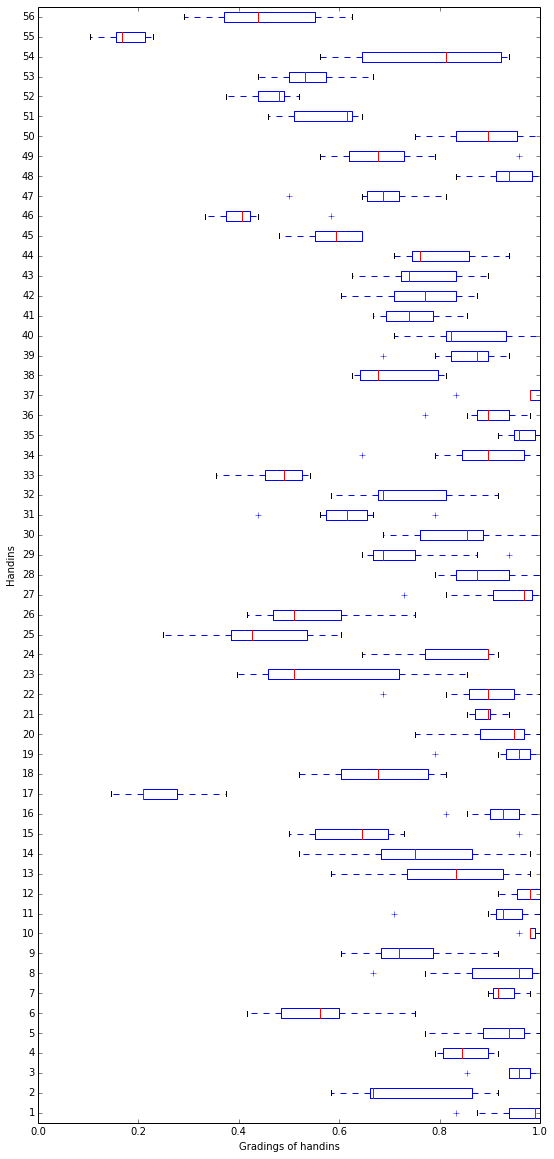

In [27]:
real_data = assignment_handins(ObjectId("55f69a6cb3cbf8000b5ae1c8"))

ax = plt.subplot(111)

values = list()
labels = list()

for scores, handin_id in real_data:
    v = map(lambda x: x[0],scores)
    values.append(v)
    labels.append(handin_id)
    
plt.boxplot(values,0, vert=False)

box = ax.get_position()
ax.set_position([box.x0, box.y0,
                 box.width*1.5, box.height*5])
plt.ylabel('Handins')
plt.xlabel('Gradings of handins')
plt.xlim(0,1)
plt.show()

In [43]:
def hist_grading(assignments):
    
    count_ass = len(assignments)

    for i, (ass_id,name) in enumerate(assignments):
        
        ax = plt.subplot(count_ass,1,(i + 1))
        
        real_data = assignment_handins(ass_id)

        values = list()
        labels = list()

        for scores, handin_id in real_data:
            v = map(lambda x: x[0],scores)
            values.extend(v)
        print len(values)
        if values != None and len(values) > 0:
            print name
            print str(ass_id)
            
            plt.hist(values,bins = 30)

            box = ax.get_position()
            ax.set_position([box.x0, box.y0,
                             box.width*2, box.height/2*count_ass])
            plt.xlabel('Gradings of handins')
            plt.xlim(0,1)
            plt.show()


UNIX, Python and Fast Data
55f277cff3bd61000a2112d4
478


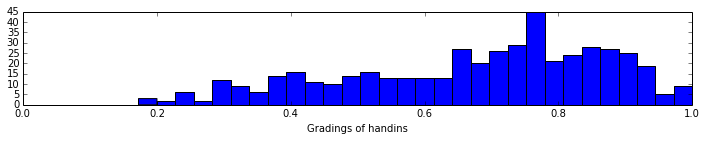

Databases and Streaming
55f69a6cb3cbf8000b5ae1c8
429


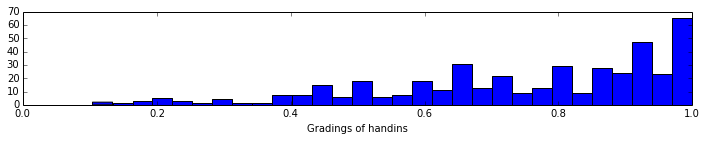

Big Data and Deep Learning
55f7cd326e34ab000b4bc376
490


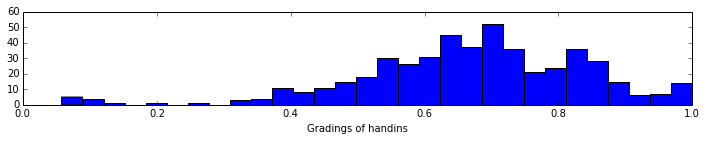

Vands varmekapacitet
563cd65e8dbdd0000f3648be
12


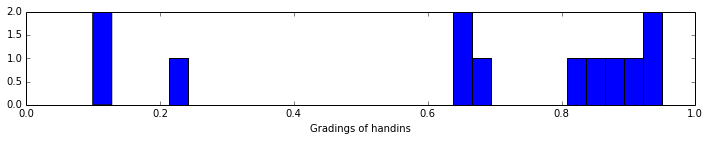

Your Choice of Subject
55f7cd456e34ab000b4bc37c
496


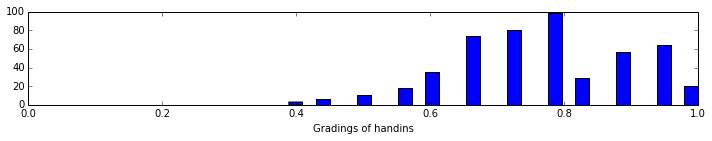

Assignment 1
5602625c568a61000f81eddd
146


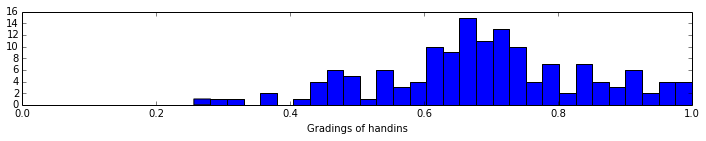

Assignment 2
562d0edb79c852000f99c6dd
128


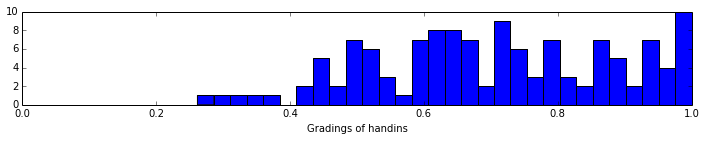

Video assignment
562e412279c852000f99c6e8
503


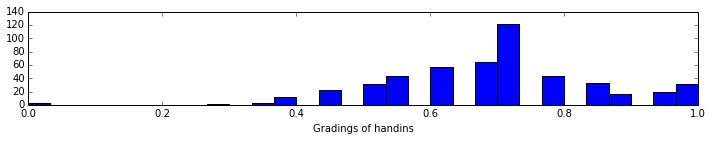

Peer Review 1
563b1c4647a659000f2c1354
0
Project Assignment A
563f4898ec95d1000fb62125
101


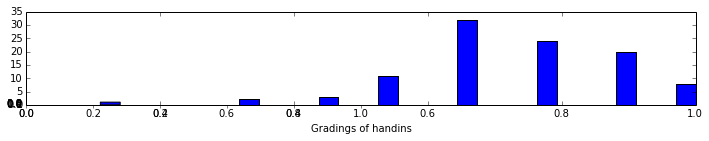

Project Assignment B
563f6176ec95d1000fb62131
127


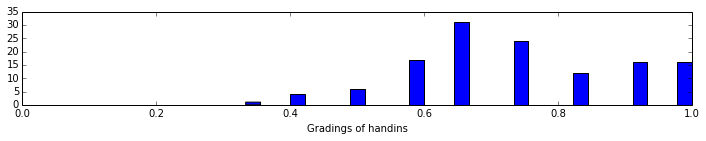

Peer Review 2 
56434092968404000fc385d9
48


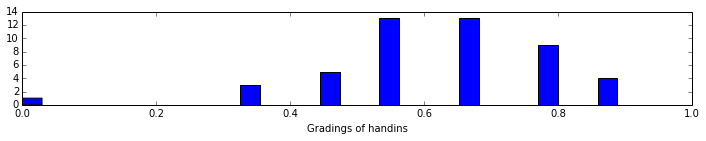

Peer Review 3
564c57ded246d3000fb71a7a
159


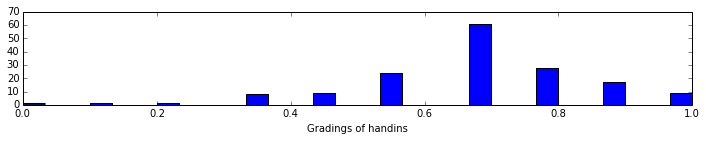

Solceller forsøgsdag 1
564e428182f196000fe09a8d
18


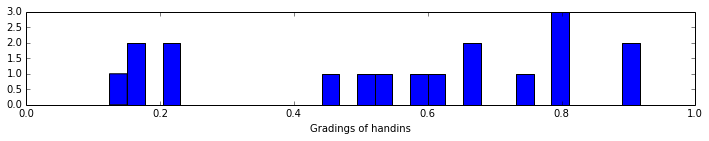

Peer assessment af projekt 1 på 27004
564efa0a82f196000fe09b17
174


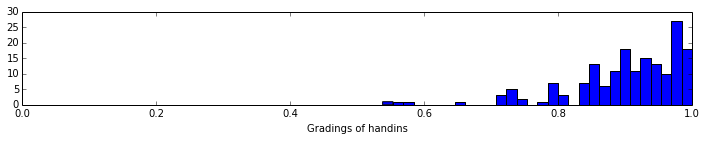

Fysikmetoder i AT
56522cb42324fa00140be1bc
41


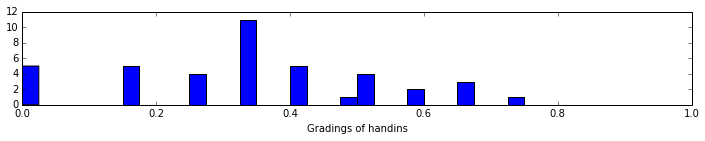

Hold 4 - Thea
5652c10c2324fa00140be1d4
0
test opgave
565440c8325f23000fb0a64a
0
Peer Review 4
5656b40709c057000f44bf5a
145


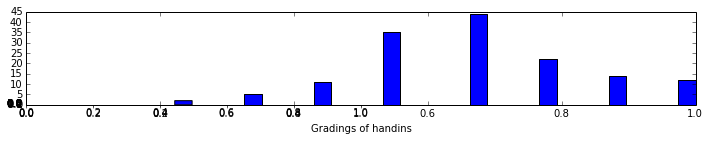

Aflevering 1
569394c9ed5fcc001ef8a595
0
Hold 1 - Jonas
5652ceb82324fa00140be1dd
0
Hold 2 - Sebastian
5652cec82324fa00140be1de
0
Hold 3 - Pernille
5652ced62324fa00140be1df
0
Hold 5 - Nicoline
5652cef12324fa00140be1e0
0
Hold 6 - Louise
5652cf0b2324fa00140be1e1
0
Hold 7 - Cecilie
5652cf182324fa00140be1e2
0
Hold 8 - Nina
5652cf242324fa00140be1e3
0
Hold 9 - Kiva
5652cf322324fa00140be1e4
0
Databehandling nyttevirkning
56668ec108072c000ffb42fc
48


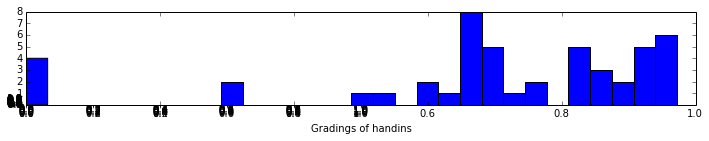

blomsterforstøver
5671846bd175da000f25f310
0
Test
567273c8d175da000f25f5e7
0
Monday January 4
568a8417fa7a25000ff2eaa6
304


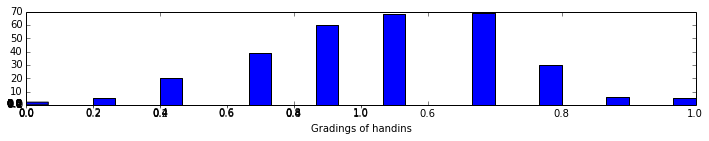

Tuesday January 5
568bd6c495db45000f424016
236


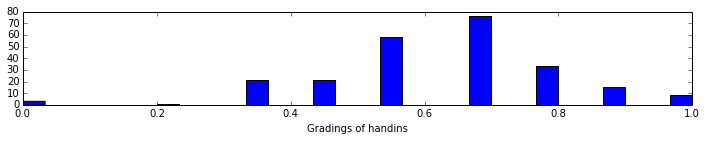

Pitch presentations
568d13e06fcbca000f116138
64


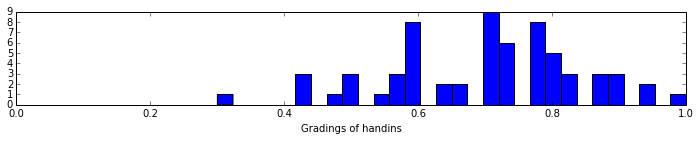

Wednesday January 6
568d146f6fcbca000f116167
277


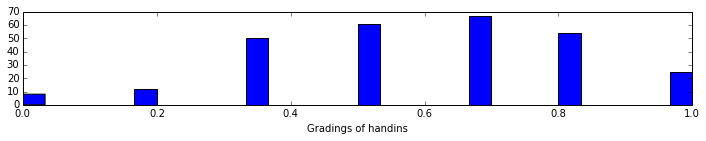

Thursday January 7
568e2ef5c6375d000f0fa6b7
275


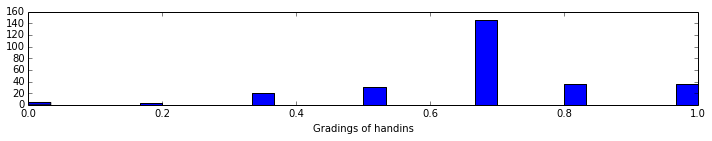

Activity 2.3 Peer Review
568e405916a88f000fc2de4c
26


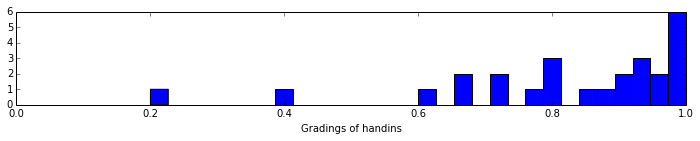

Project 
5692ba3858ac87000f28f264
0
Opgavesæt 5
5693605bb7bfc900197493b7
0
Monday January 11
5693ba54ed5fcc001ef8a597
285


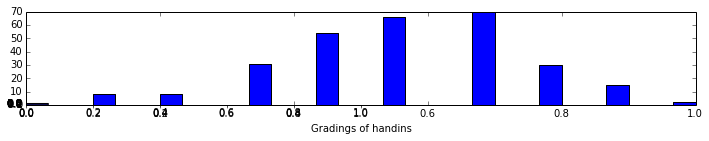

Tuesday January 12
5694cc02ee9868000f7d46fb
292


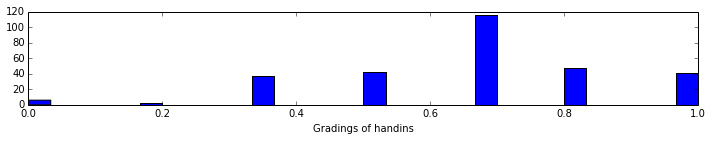

Wednesday January 13
56960c3d78f9a3000f54ac28
237


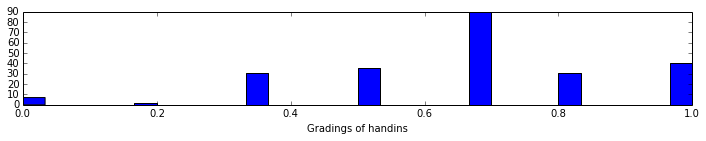

Thursday January 14
5697a2ae700960000f170784
266


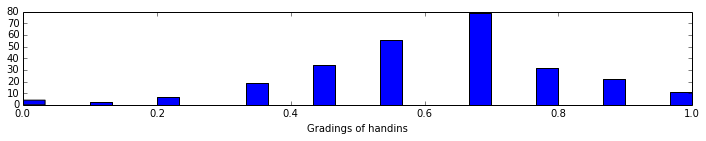

Assignment 1
5697dd25723fec000f9e6646
0
Assignment 2
5697dd32723fec000f9e6647
0
Assignment 3
5697dd3c723fec000f9e664e
0
Assignment 4
5697dd46723fec000f9e6652
2


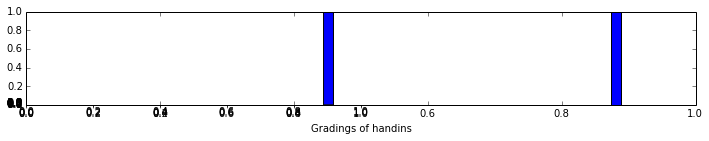

Assignment 2.5
5697e072723fec000f9e6680
0
Monday January 18
569c9e2d8e298a000f054ed7
252


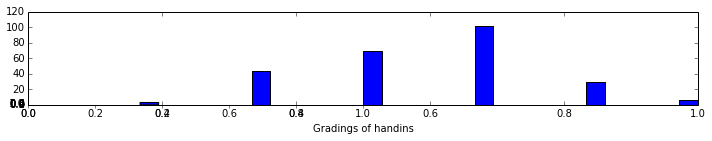

Genaflevering
569ca1938e298a000f054eeb
0
1. Beskriv dit barndoms køkken
569dd0edadca9d000f80c9c6
68


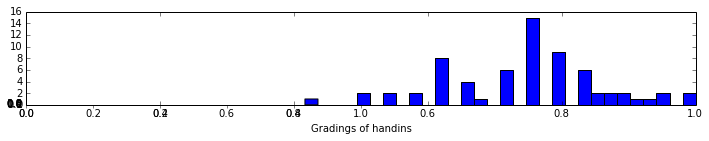

2. En kort klassisk novelle
569dd902adca9d000f80c9d1
85


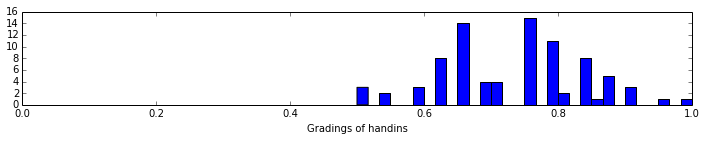

3. En kort modernistisk novelle
569dd99fadca9d000f80c9d2
67


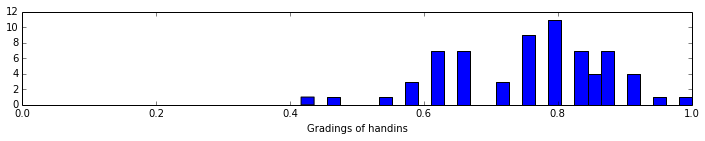

4. Kroppen, stedet og skriften
569dda52adca9d000f80c9d3
82


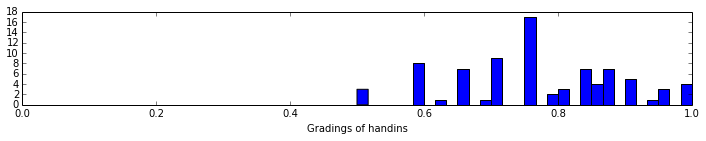

5. Minimalisme
569ddb15adca9d000f80c9d4
60


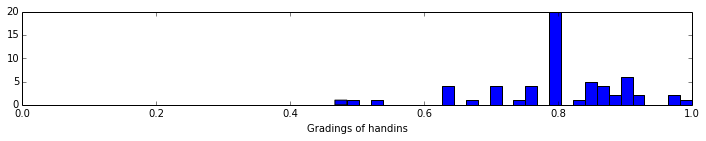

6. Kortprosa
569ddc32adca9d000f80c9d5
53


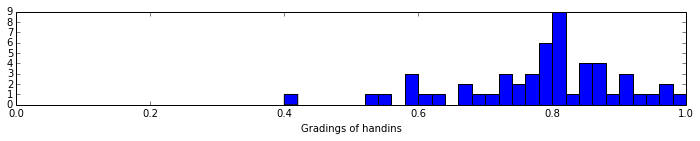

7. En åbning (fra skriveworkshoppen)
569de07dadca9d000f80c9d6
39


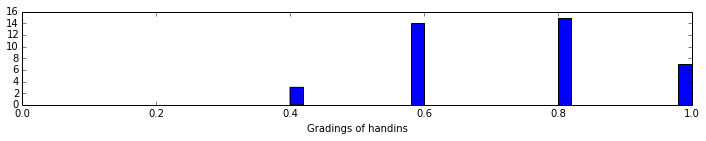

8. Realisme
569de15cadca9d000f80c9d7
63


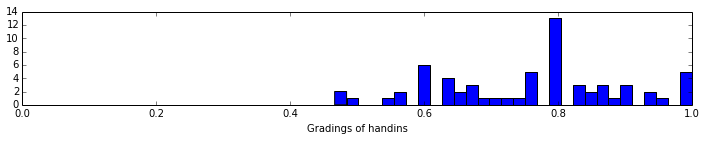

9. Upålidelig fortælling: CID, FID og Ambiguous Discourse (AD)
569de247adca9d000f80c9d8
53


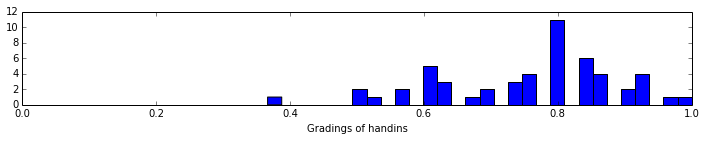

10. Autofiktion
569de6a0adca9d000f80c9db
60


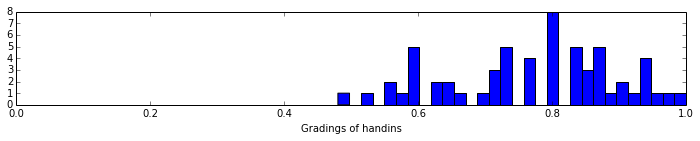

11. Implicit og eksplicit lyrisk jeg
569de785adca9d000f80c9dc
36


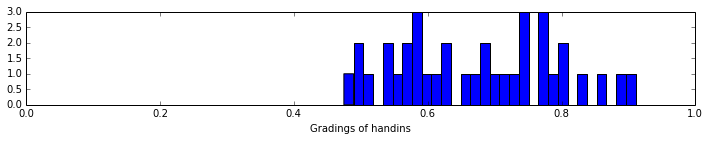

12. Troper, tale- og tankefigurer
569de826adca9d000f80c9dd
38


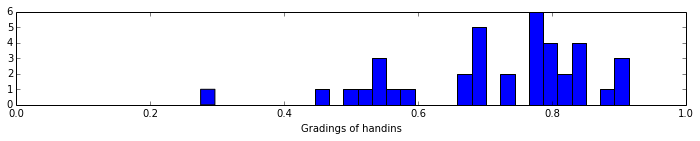

13. Digt uden bindinger
569de8daadca9d000f80c9de
0
14. Systemdigtning
569de9bbadca9d000f80c9df
0
Tuesday January 19
569dff76adca9d000f80c9e1
275


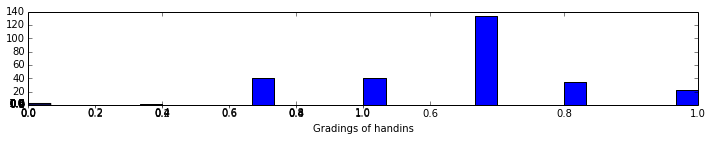

Assignment uden kategorier
569e19ac570433000fae2765
0
Franske filosoffer
569e1b4f570433000fae276a
0
Test2
569e1bda570433000fae276d
0
Wednesday January 20
569f5d653b0d5e000f531cd9
224


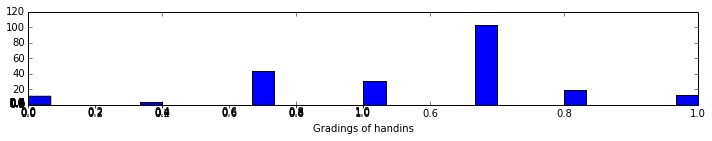

Course Project 
569fa4fc87ff5c000f9eff02
1


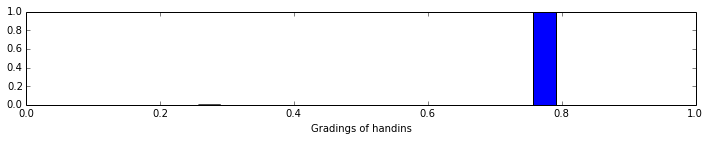

Thursday January 21
56a0a0e2b8e5f5000f8659d5
235


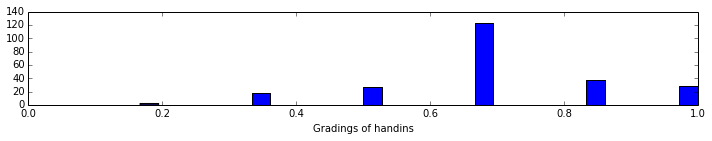

What do we think of Peergrade?
56a205d8071819000f3bf167
0
Another Assignment
56a2097e071819000f3bf170
0
New Peergrade
56a21636071819000f3bf176
0
Projektopgave - Klima, vand og miljø. Del 1A+B
56a5f130408901000fa67ef5
94


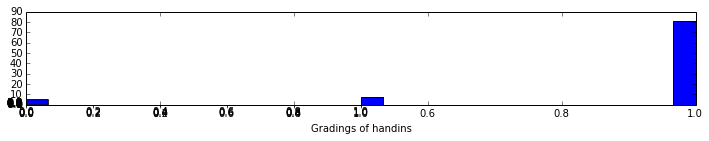

Group Test
56a770cf299aa6000fd311e1
0
Another Group Assignment
56a773f1299aa6000fd311ed
0
Mandatory Assignment 1 - Regular Languages
56a9ec5e6dfa39000fe0aeca
180


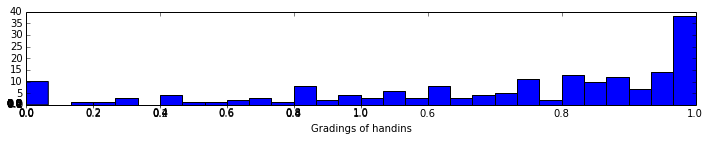

Aflevering 1: Sjov med tabeller
56ab3b44002566000f6f34e8
655


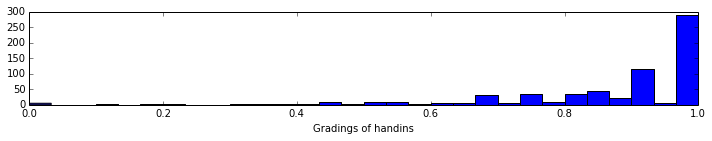

Min kompetenceprofil
56ab5441dda4d3000f894bc9
0
Oversættelse
56ab6ef4e58bd2000fe662dd
0
Demo Assignment 1
56af03f5ec3860000f620da2
6


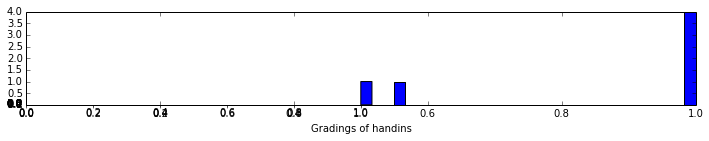

Last Semester's Final Papers
56af1d08ec3860000f620dc4
0
Clause of the week #1
56b09e660e43e4000fb0ebee
54


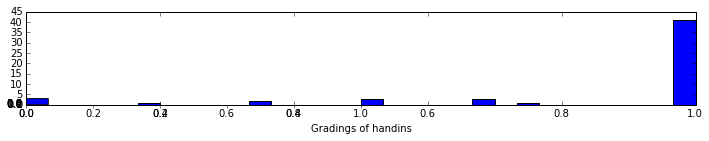

Gruppekontrakt v. 1
56b1bf720548e3000f9fd8eb
0
Maelström
56b1f825addf0b000fc7678c
0
Christiansø
56b202160f0a77000fa65747
0
15. Egen skrift uden bindinger 1
56b2f31046a67a000f940c5f
0
16. Egen skrift uden bindinger 2
56b2f5b646a67a000f940c72
0
Testopgave nr. 1
56b4cc8aac23df000f356c5a
6


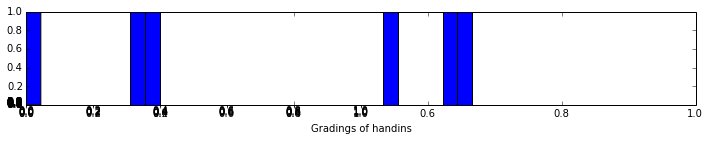

Hjemmeopgave 1
56b7547066d087000f26f178
81


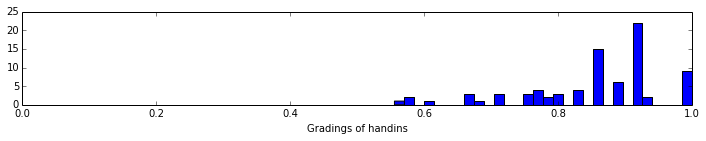

Academic Writing Exercise 1: PR history
56b77e20d9a0cb000fa97a25
13


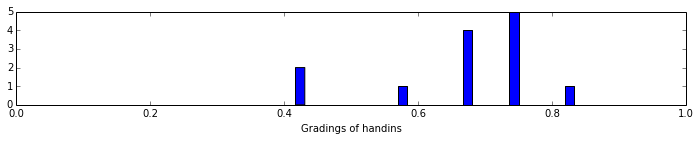

logbog uge2
56b87af9a6d642000f5b2fa0
0
Organisationsforståelse
56b89a1aa6d642000f5b3028
86


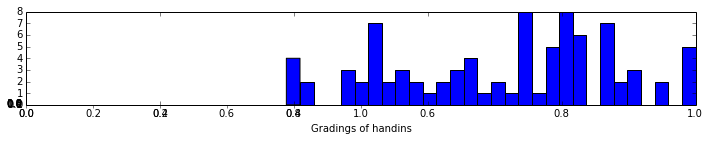

Dokumentarfilm 1
56b8f724a6d642001566bf5d
42


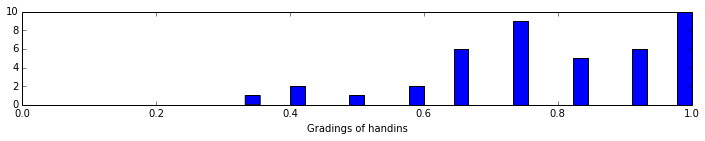

Test1
56bb0c4c9ab440000fa1053c
0
Assignment 1: Drag on airfoil
56bb136c9ab440000fa10542
85


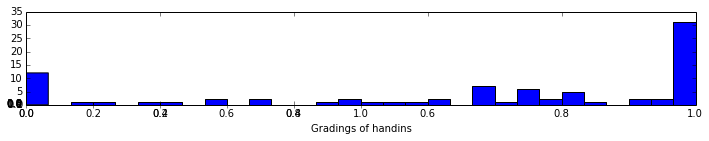

Testopgave til 62081 for at se hvordan peergrade virker
56bc44d47d3562000f68e961
53


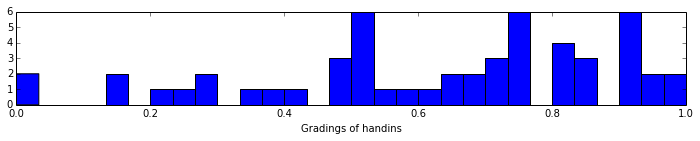

Aflevering 2: Manglende tal
56bc9547ab0a12000f253e5b
583


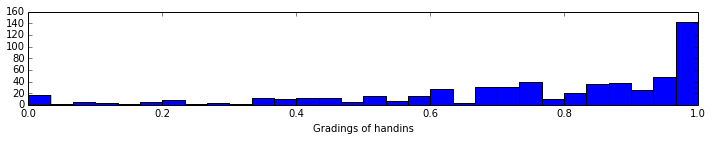

Exercise project: Bacteria data analysis
56bdb1c1ab0a12000f2542f9
0
Hjemmeopgave 16F-2
56bdc59fab0a12000f25435e
49


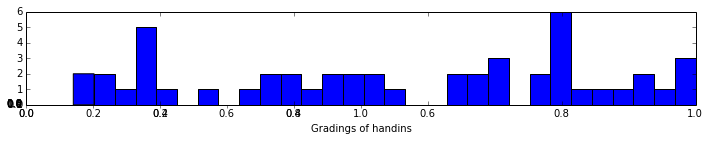

Building a tree from scratch: What are the closest relatives of whales?
56befb1ddde080000fe09eff
75


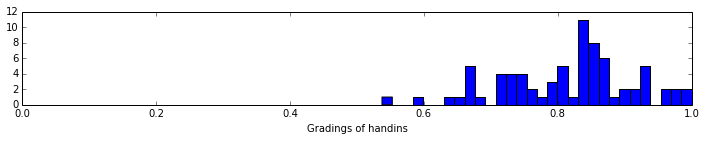

logbog uge3
56c09f7f13dc75000f71bedc
0
1
56c166c91505fb000f1e6b9e
0
Academic Writing Exercise 2: Organisations and Branding
56c19916e92fdd000fd98ea2
3


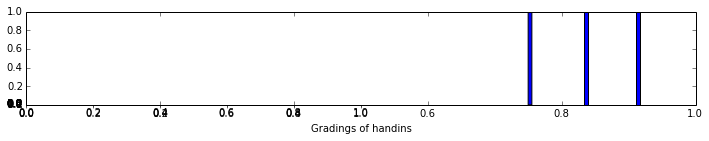

logbog uge4
56c1f746557069000f872894
0
logbog uge5
56c1fad7557069000f8728b7
0
logbog uge6
56c1fb25557069000f8728b8
0
logbog uge7
56c1fb79557069000f8728c3
0
logbog uge8
56c1fbc4557069000f8728c4
0
logbog uge9
56c1fc0c557069000f8728c5
0
logbog uge10
56c1fc3d557069000f8728c6
0
logbog uge11
56c1fc6b557069000f8728c7
0
logbog uge12
56c1fca1557069000f8728c8
0
logbog uge13
56c1fd1c557069000f8728c9
0
Skriveøvelse 2: Online- og interaktiv dokumentarisme
56c262c7557069000f872bfe
27


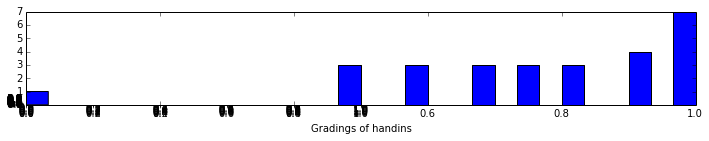

Assignment 1
56c2f71e557069000f872cc7
52


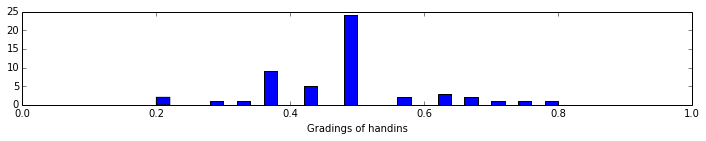

Clause of the week #2
56c304f5557069000f872d08
85


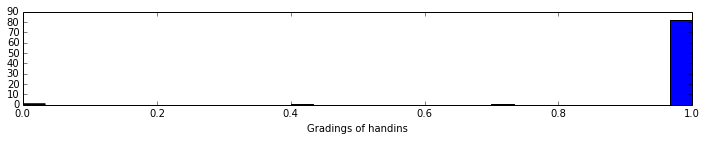

Homework 1
56c325f0ccd2b5000f744942
24


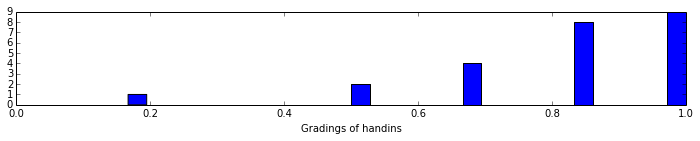

Skriveøvelse 2: Online- og interaktiv dokumentarisme
56c339c5ccd2b5000f7449dc
64


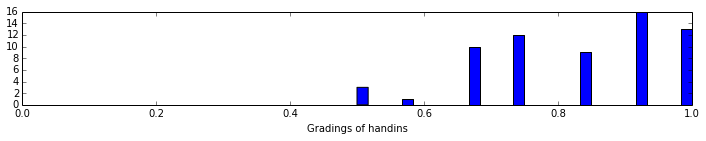

Opgave 1 - Pølsens Kvalitet
56c33a48ccd2b5000f744a07
88


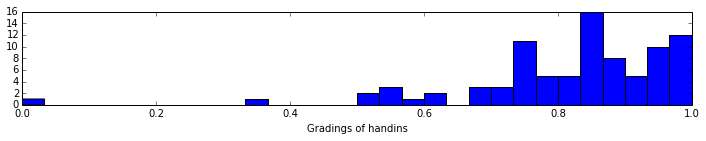

Innovationsproblemformulering & undersøgelsesdesign v.1.
56c38a73ccd2b5000f744c0f
0
Assignment #1
56c4439bccd2b5000f744d78
155


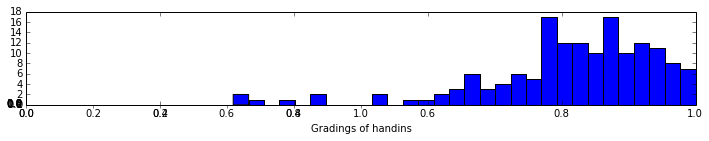

Hjemmeopgave 16F-3
56c4e6defa480b001b00e7e2
28


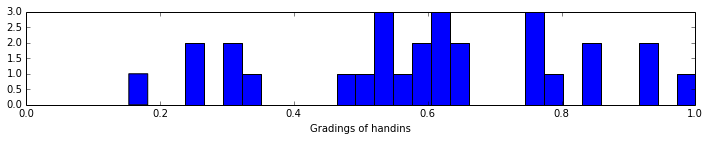

Aflevering 3: Kompleksitet
56c5d7abab1c890015689251
659


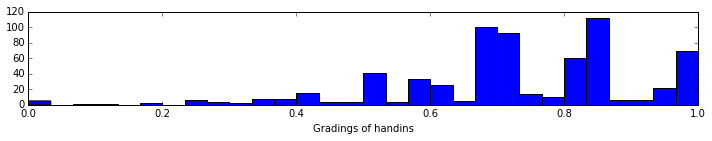

Project draft
56c7628b7aeb22000f1394c0
0
KU/IVA/Digital kultur F2016: Portfolio 1 (PF1)
56c8581086995e000f728454
75


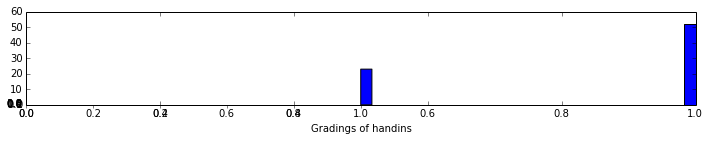

Skriveøvelse 3: Problemformulering
56cb91c114fa69001579d3b5
12


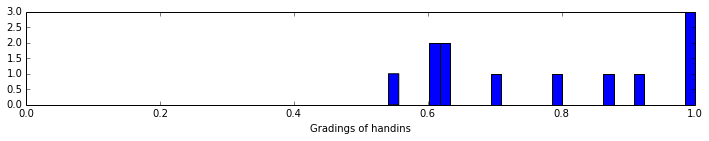

Skriveøvelse 3: Problemformulering
56cb982414fa69001579d423
0
IMRAD rapport arkitekturhistorie
56cc35577f2886000fa2573b
64


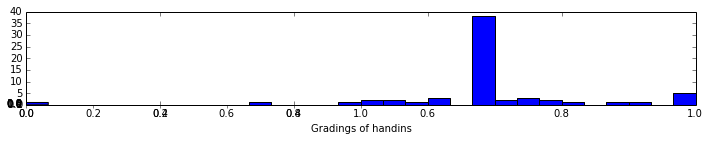

Clause of the week #3
56cc41e87f2886000fa2582b
57


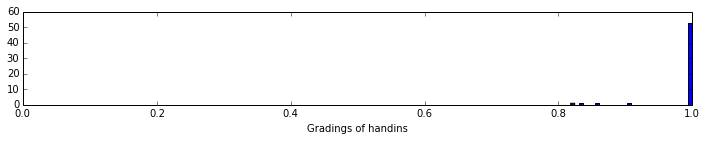

Writing Exercise 3: 
56cced597f28860015195c49
0
Gruppekontrakt version 2
56cd6e09e0be1000157ce9ca
0
Hjemmeopgave 16F-4
56ce2afce0be1000157cf3d7
46


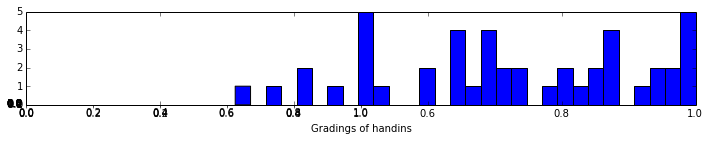

Testoversættelse
56ceffe7efc245000f2a2acd
0
Test
56cf146995374a000fa25b33
0
Kort analyse af Mussolinis tale
56cf946cd0a2b0000f799c6e
0
Assignment 1
56d0059cd0a2b0000f799d65
3


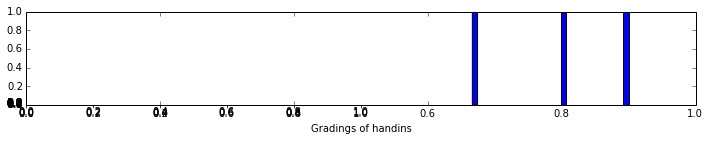

Mussolini
56d034c66e0834000f91f6d1
0
Aflevering 4: Implementation af dobbelt-hægtede lister
56d05d7d6e0834000f91fa10
471


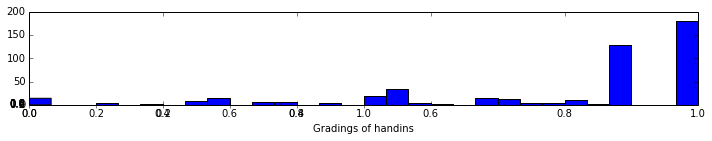

Assignment 1
56d15cd56e0834000f91fcb0
179


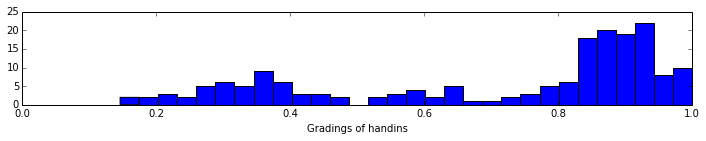

Hjemmeopgave til lektion 5b
56d1d48391b922000fd13ca3
0
Vision
56d3f77d788d5a0015166075
698


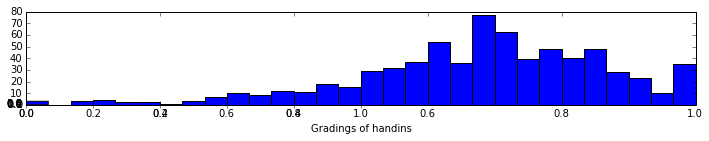

Homework 2
56d438b4725d40000f2cad7d
24


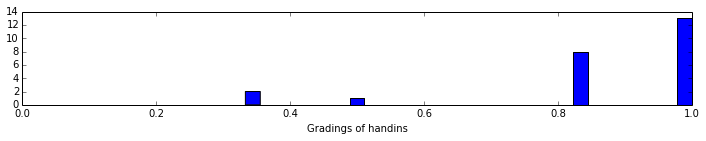

Hvad er blended learning? 
56d43e55725d40000f2cae85
0
Test assignment
56d44dff725d40000f2cb107
0
Primo Levi, Se questo è un uomo
56d59859573716000f693786
0
Korea SAQ
56d5e93678a8fe000f2ca143
0
Assignment 2
56d5f47e78a8fe000f2ca1ae
239


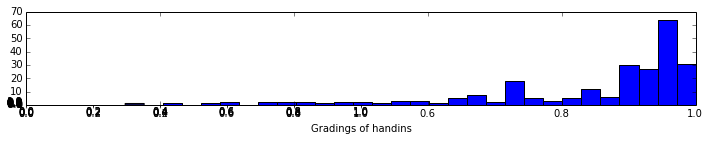

New Korea
56d6ef0d31a0170015a7b968
0
Problemformulering for uge 6
56d6ef7131a0170015a7b96a
0
CBS test
56d6f4fe31a0170015a7b9cc
0
Peer Review Assignment 1
56d6ffee31a0170015a7ba1c
252


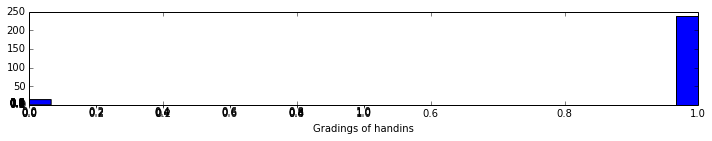

Test af Peer Review
56d803c34399280015d24f01
0
Roma, città aperta
56d8c438ad9a03000fd728c4
25


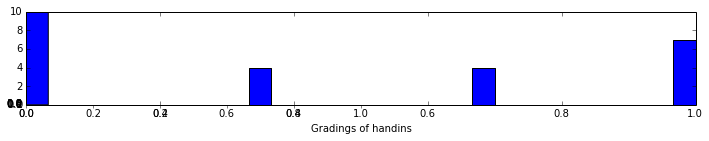

IMRAD rapport arkitekturhistorie
56d93a20ad9a03000fd7294f
86


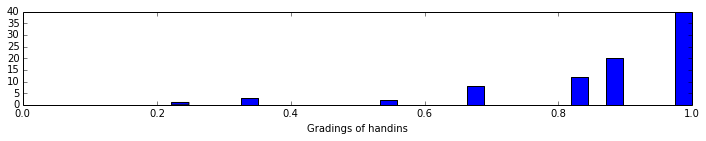

Essay #1 - anonymised
56d964c7ad9a0300151fa328
60


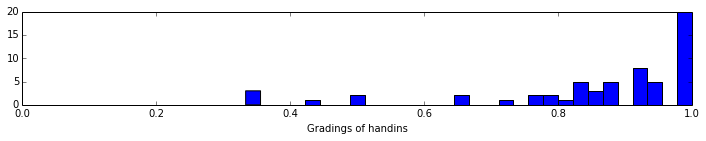

Aflevering 5: Hobe og tabeller
56d987cead9a03001bb3b4eb
529


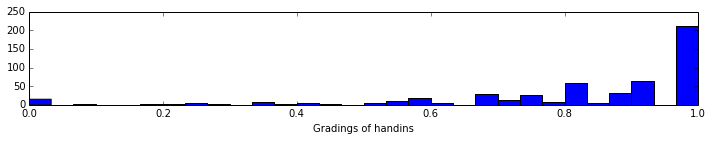

Analyse af artikel
56db1a3d31c59f000f929897
0
Opgave 2 - Table-Top Tomografi
56dd26ed4a4bed0015b719da
79


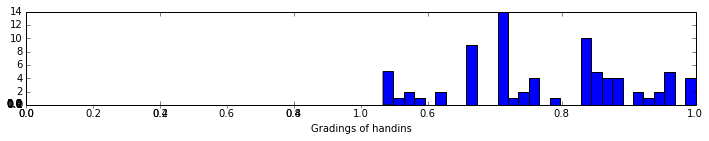

Assignment 2 Flight of Birds
56dd5cf6568a7d000f32e43f
61


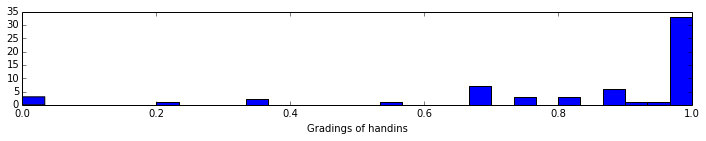

Social Media (Exercise 4)
56dd6168568a7d000f32e4a3
17


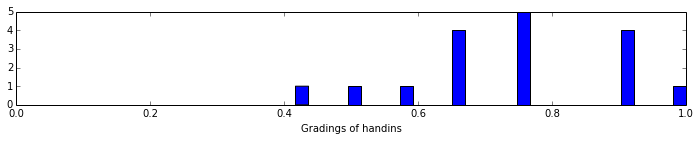

Mandatory Assignment 2 - Context-free Languages
56deb43842b083000fca2f39
93


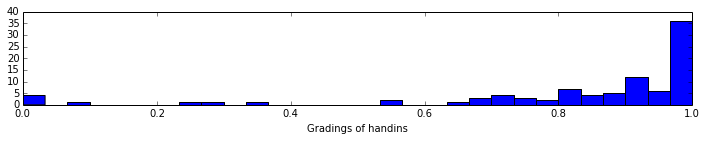

Peer Review Assignment 1 Resubmission
56df0f5442b083000fca3217
35


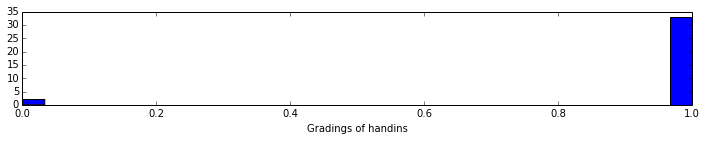

World War I Essay I
56df391c42b083000fca3394
0
World War I Essay - Invitational
56df42f942b083000fca33a6
0
Problemformulering - uge 7
56dfe6afd414df000fce9238
0
Voluntary Assignment A
56e01eb2d414df0014172e95
0
Aflevering 6: Dybdeførst søgning
56e2cb7b3a25980015a2a922
134


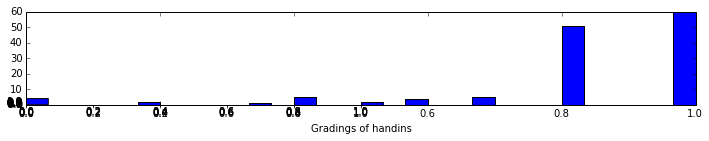

Complexity
56e3f32b86498a002de163f6
701


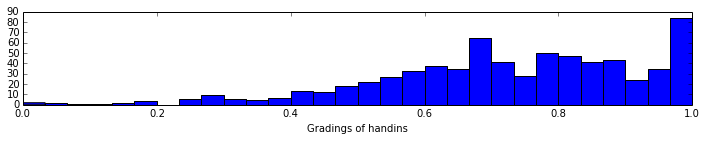

Midtvejs-opgave
56e454b386498a00338f3244
24


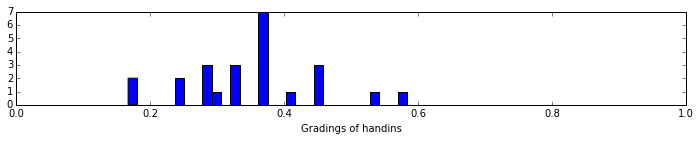

Assignment 1
56e539588eb78c0016742420
72


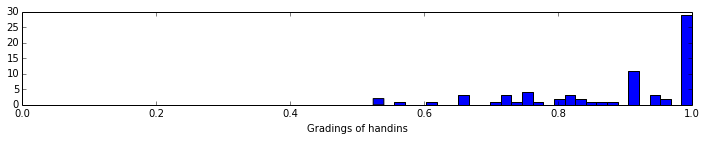

Comparison of tree building methods and codon-based alignment - The origin of the SARS virus?
56e5cc978eb78c0039a0d9ce
69


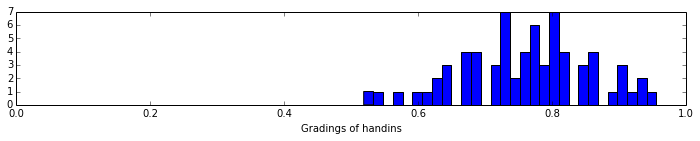

Internal communication
56e68c5ba37418000f692bfb
3


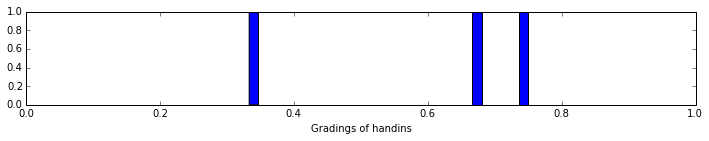

Title and Outline
56e6d7ae155706000fc6c4df
0
The Open Question Argument
56e7efa7746add000fe59fcf
0
Hjemmeopgave 16F-5
56e9b7b1a9276d000f9a7a56
61


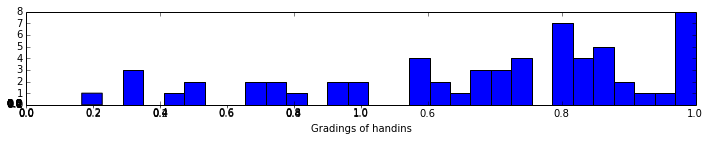

Homework 3
56ea6673a9276d000f9a7ab0
24


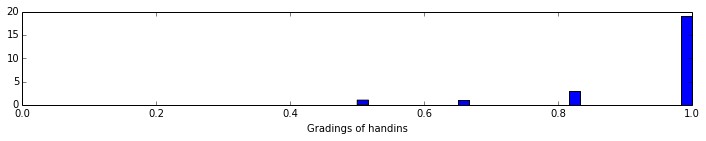

Skriv 4: Nyheder og journalistik
56ea8288a9276d001631b08d
5


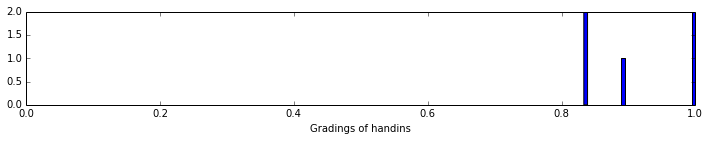

feedback
56ea84a2a9276d001631b0a3
0
Skriv 4: Nyheder og journalistik
56eab123e8ae5f000f723fb5
14


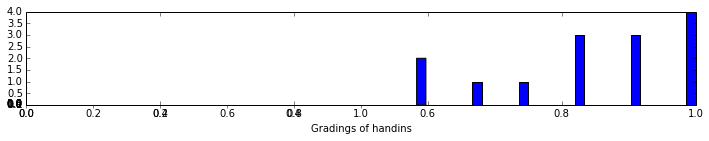

Assignment with no deadlines set
56eba822e8ae5f0015c94fd0
0
Assignment will all deadlines set
56eba84de8ae5f0015c94fd1
0
Assignment open for hand-in
56eba8a3e8ae5f0015c94fd2
0
Assignment open for hand-in 2
56eba8dbe8ae5f0015c94fd3
0
Hand in is closed, peergrade not open yet
56eba90be8ae5f0015c94fd4
0
Assignment open for peergrading
56eba946e8ae5f0015c94fd5
0
Peergrading open, but no grades to give
56eba97be8ae5f0015c94fdd
0
With long description
56eba9a4e8ae5f0015c94fde
0
No description but a file instead
56eba9c0e8ae5f0015c94fdf
0
With description AND a file
56ebaca3e8ae5f0015c94fee
0
Late hand in test
56ebad2be8ae5f0015c94fef
0
Open peergrade: with grades to give
56ebad8ce8ae5f0015c94ff0
0
Open peergrade: with grades to give and finished (e.g. 4/4)
56ebadc6e8ae5f0015c94ff1
0
Closed peergrade: see feedback given to peers (My feedback) and see received feedback
56ebae17e8ae5f0015c94ff2
2


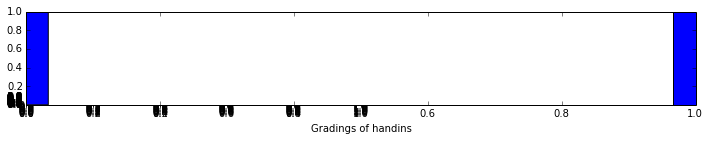

Closed peergrade: no received feedback
56ebb140e8ae5f0015c95009
0
Allowed to peergrade late
56ebb16ae8ae5f0015c9500a
0
Self grading
56ebb191e8ae5f0015c9500b
0
Peergrade TEST
56ec6eeab5ae8e000f82304d
0
Aflevering 8: Plantegning
56eff6a0326bb3000f4f5e2a
216


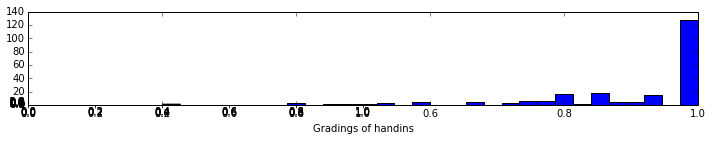

Aflevering 7: Sociale Netværk
56eff76c326bb3000f4f5e2b
237


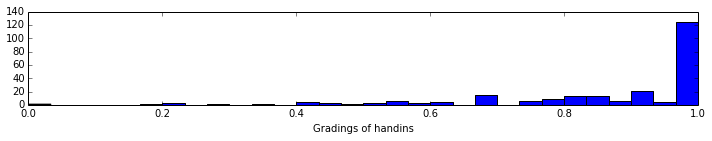

Aflevering 9: Kruskals algoritme
56eff7f4326bb3000f4f5e2c
73


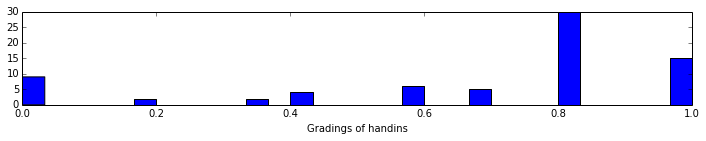

Assignment #01
56f29d8c18fdbc0016facb8e
3


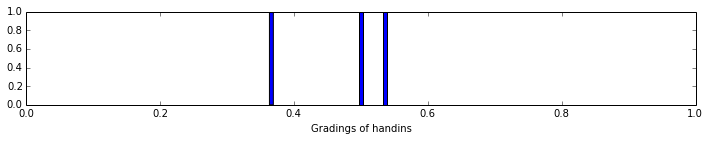

Podcast - aflevering 2
56f9519ef9098d000f3a0a47
0
Projet SLAM5
56f98712f9098d000f3a0ade
12


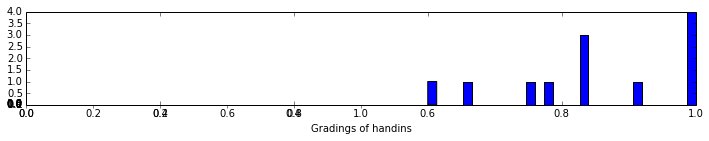

Clause of the week #4
56fa67adc06acc000f3da25e
41


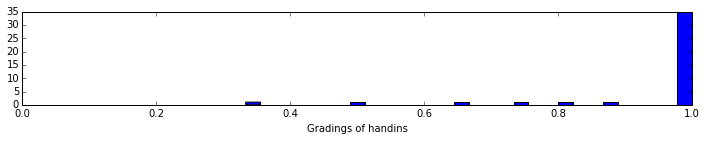

Peer Review Assignment 2
56faa0a2aecfdd000f563de5
266


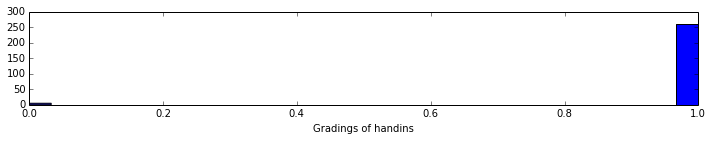

Strategisk analyse
56faaaae9a66b7000fb2fad8
29


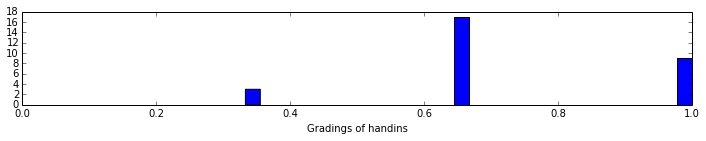

Refleksionsrapport version 1
56fb787bd10cde000f7a44e7
0
Comment of the week #1 (Lesson 8)
56fe027bd0e8e8000f6f0a7e
47


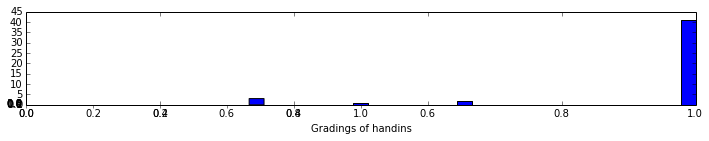

Clause of the week #5 (Lesson 9)
56fe0321d0e8e8000f6f0a7f
27


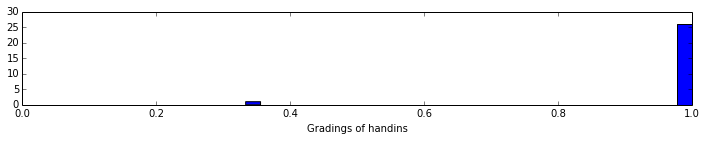

Comment of the week #2 (Lesson 10)
56fe03d3d0e8e8000f6f0aa4
26


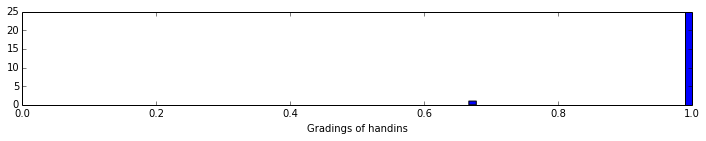

Clause of the week #6 (Lesson 11)
56fe047fd0e8e8000f6f0aa5
41


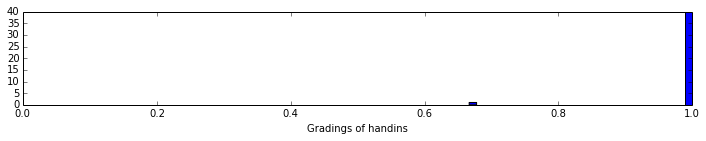

Clause of the week #7 (Lesson 13)
56fe051dd0e8e8000f6f0aa6
0
Essay #2
56fe060bd0e8e8000f6f0aa7
9


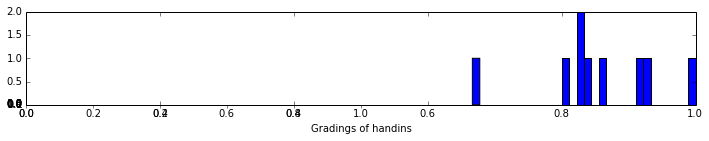

Opgave 3 - Dimensionsanalyse & Skalering
56fe44679997ee000f64e9f2
85


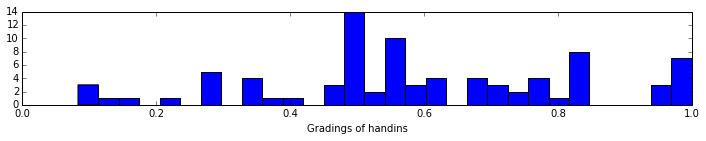

Homework 4
56fe824b9997ee000f64eba3
18


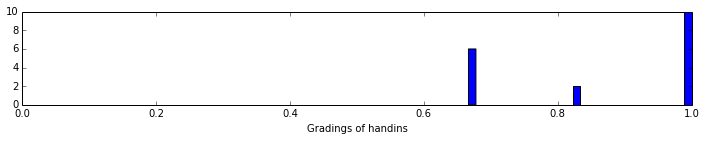

Hjemmeopgave 16F-6
57003e609947aa000ffa8ce8
35


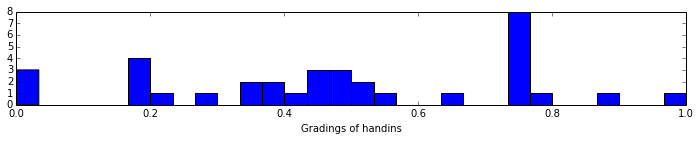

Mackie
5700ff04adde9b000f3e08d5
0
Railton afsnit III
5701016eadde9b002a58acba
16


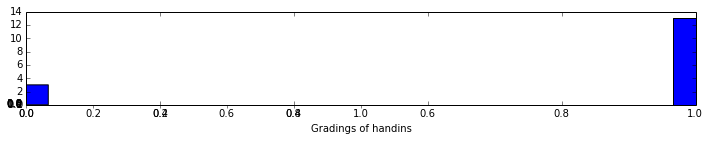

Peer Grading - let's test
57017e0badde9b003c3410be
0
Opgave Stato & Costituzione
570222e9d5d3920018d148ed
0
PODCAST
5702267c389446000fe82571
0
Assignment 3 Flow and pressure losses in ventilation pipes
570277f6389446001890de8a
32


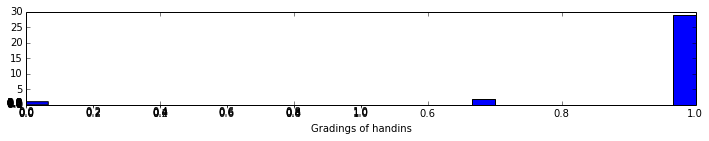

Python and Fast Data
570353e2389446003ccc34a9
20


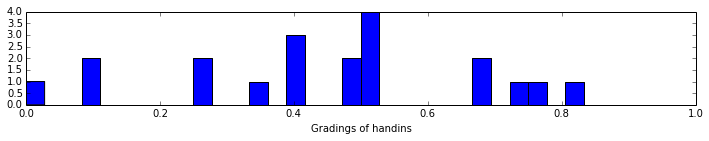

Big Data and Hadoop
570353e6389446003ccc3554
21


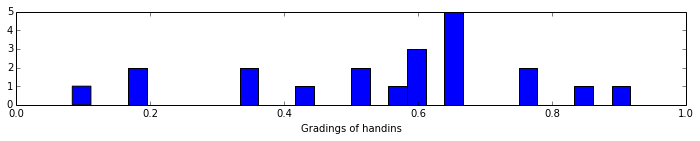

Large Scale Text Modelling
570353e7389446003ccc3611
18


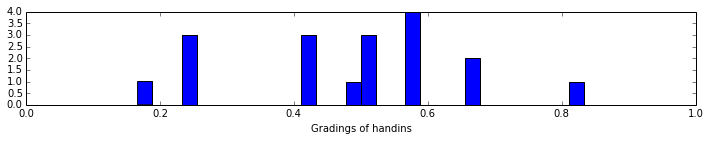

Deep Learning
570353ea389446003ccc36c8
19


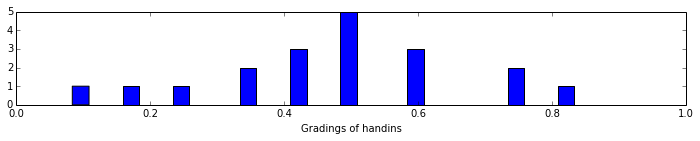

Cognitive Neural Networks
570353eb389446003ccc377f
32


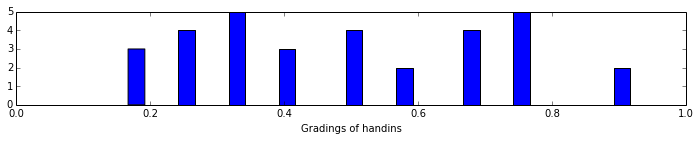

Python and Fast Data
5703548a389446003ccc3897
25


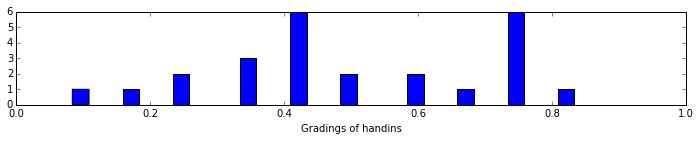

Big Data and Hadoop
5703548b389446003ccc3960
22


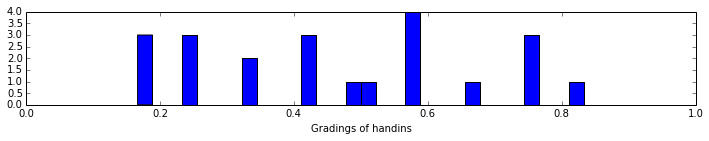

Large Scale Text Modelling
5703548c389446003ccc3a23
17


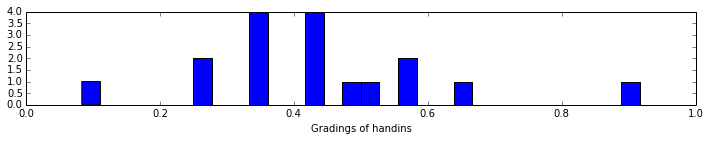

Deep Learning
5703548c389446003ccc3ac8
20


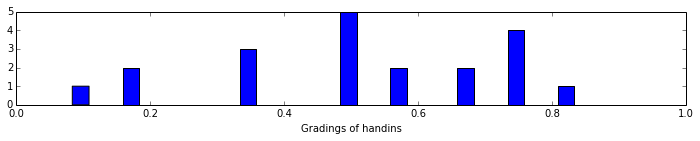

Cognitive Neural Networks
5703548d389446003ccc3b7f
33


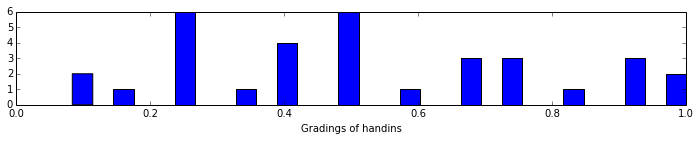

Skriv 5: Faktaformer på Internettet
57037e81aadde0000fa33957
6


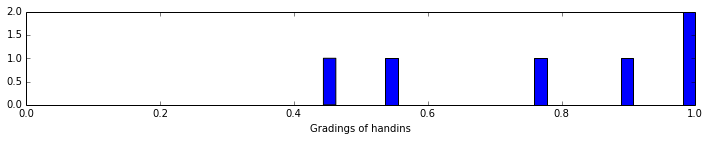

Skriv 5: Faktaformer på Internettet
5703862faadde0000fa33a1a
19


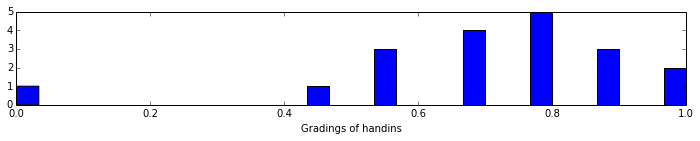

Python and Fast Data
5703bbfe76a495000fcc0c1a
19


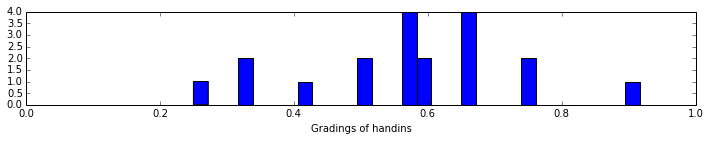

Big Data and Hadoop
5703bc0076a495000fcc0cd7
20


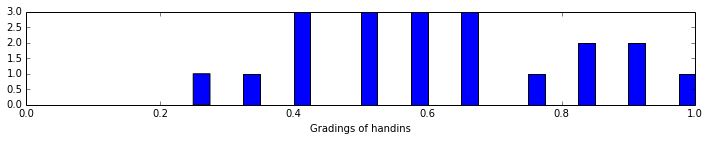

Large Scale Text Modelling
5703bc0476a495000fcc0d88
21


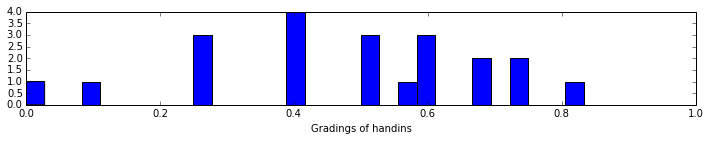

Deep Learning
5703bc0976a495000fcc0e39
15


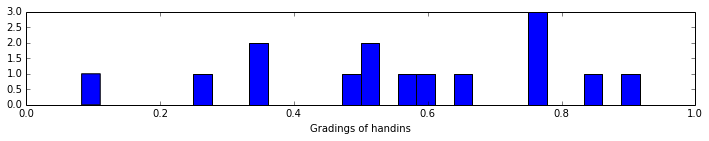

Cognitive Neural Networks
5703bc0c76a495000fcc0ec0
26


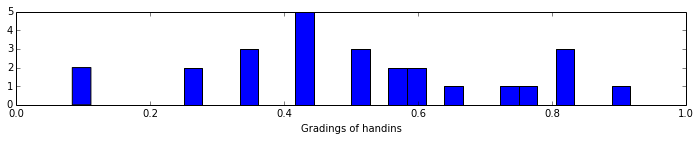

Tema 1: Begrundelser
570510e1491bf30018386204
23


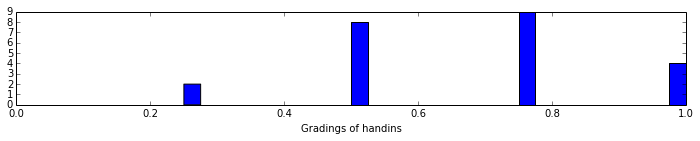

Tema 2: Læringsteori
57051486491bf30018386253
0
Tema 3: Praktisk arbejde
57051b2a491bf3001838628b
0
Tema 4: Tværfaglighed
57051cc6491bf300183862a0
0
Tema 5: Evaluering
57051ff3491bf300183862c5
0
Logbook Experiment 1
570628a739cbee0018807ca7
0
Kapacitancen i højspændingsmast: Eksamen 2015, Opg 2.
57062a3a39cbee0018807cae
0
Python and Fast Data
570643d739cbee00188080d6
19


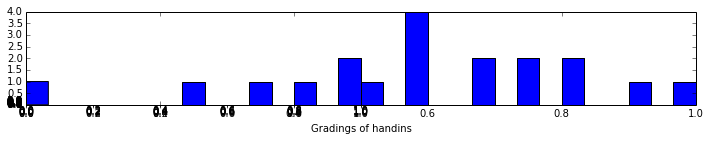

Big Data and Hadoop
570643db39cbee0018808187
18


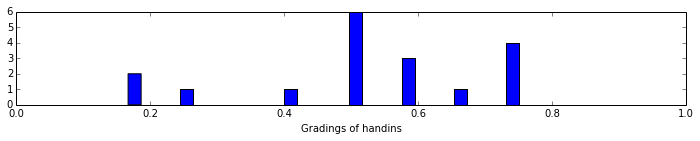

Large Scale Text Modelling
570643db39cbee001880822c
21


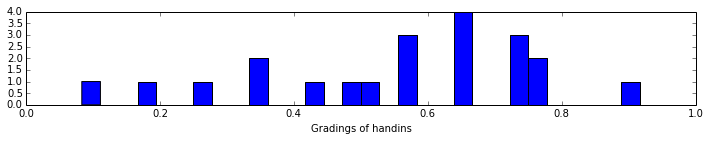

Deep Learning
570643de39cbee00188082d7
22


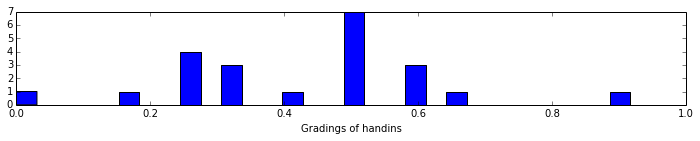

Cognitive Neural Networks
570643df39cbee001880839a
34


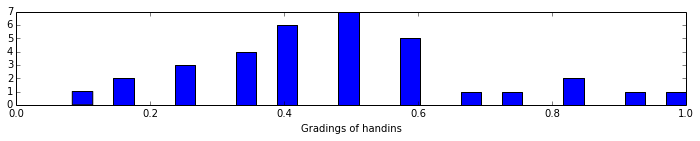

Miracolo economico: pubblicità
57064a6739cbee00188084ab
0
Video pitch
57064e4539cbee0018808509
160


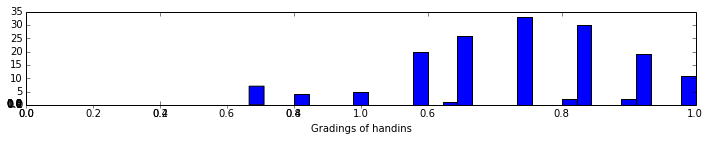

Python and Fast Data
57064f6939cbee0018808532
13


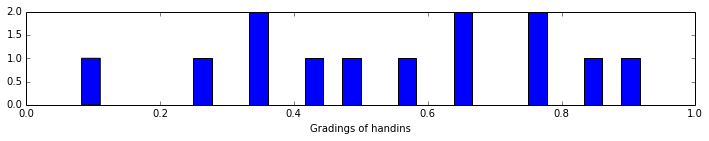

Big Data and Hadoop
57064f7039cbee00188085d1
19


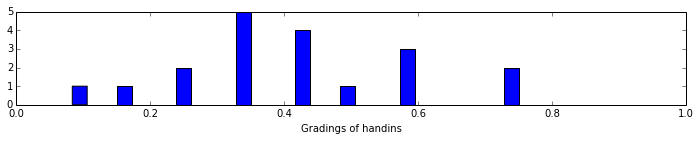

Large Scale Text Modelling
57064f7139cbee0018808682
17


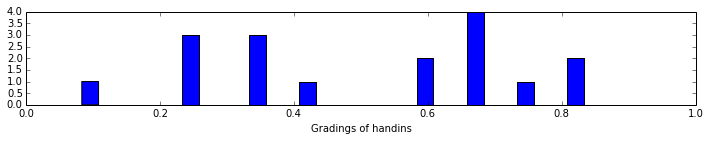

Deep Learning
57064f7239cbee001880871b
19


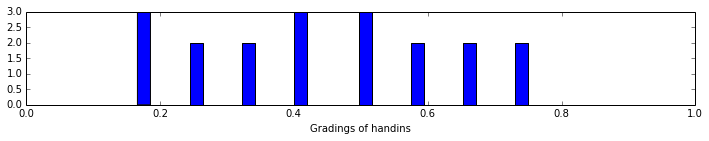

Cognitive Neural Networks
57064f7539cbee00188087d2
28


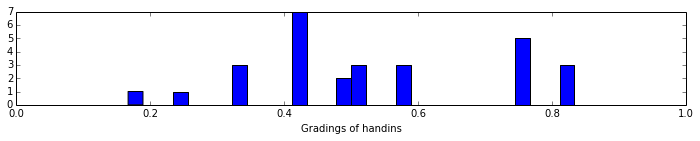

Python and Fast Data
5706519f39cbee00188088dc
22


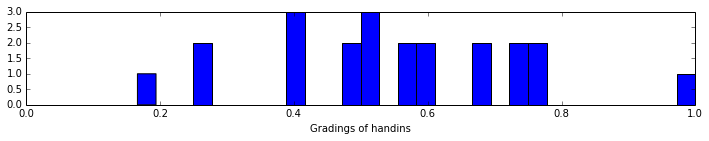

Big Data and Hadoop
5706519f39cbee0018808993
21


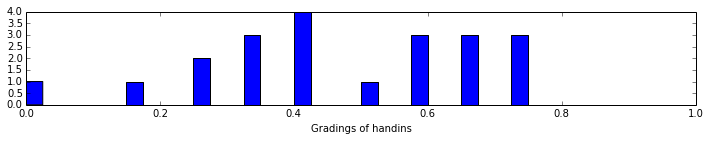

Large Scale Text Modelling
570651a039cbee0018808a4a
23


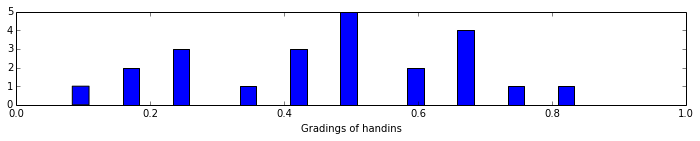

Deep Learning
570651a039cbee0018808b07
18


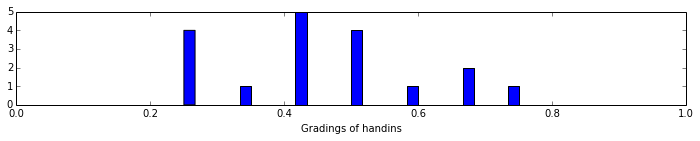

Cognitive Neural Networks
570651a139cbee0018808ba0
26


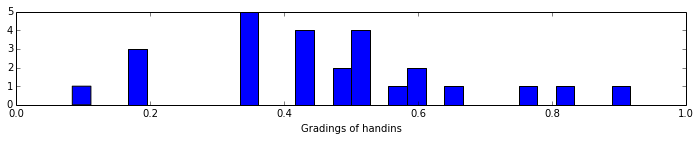

Temp: Den tværgående
5706746539cbee0018808ca1
0
Temp: brug af feedback
570674a039cbee0018808ca7
0
Temp: Tema 1 specifik
570674ea39cbee0018808cab
0
Temp: Tema 2 specifik
5706750f39cbee0018808cb1
0
Temp: Tema 3 specifik
5706753a39cbee0018808cb7
0
Temp: Tema 4 specifik
5706756939cbee0018808cbd
0
Temp: Tema 5 specifik
5706759c39cbee0018808cc3
0
Python and Fast Data
570675ad39cbee0018808ce2
18


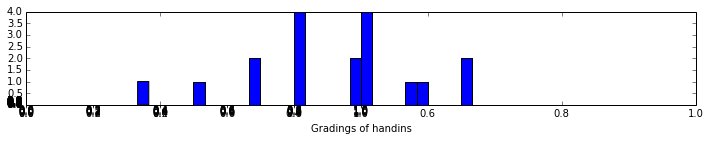

Big Data and Hadoop
570675b839cbee0018808d81
19


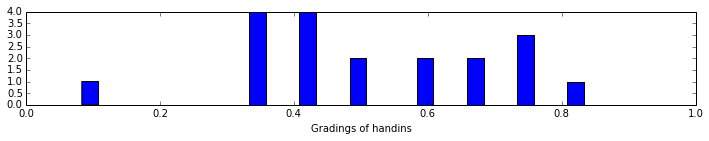

Large Scale Text Modelling
570675bc39cbee0018808e32
20


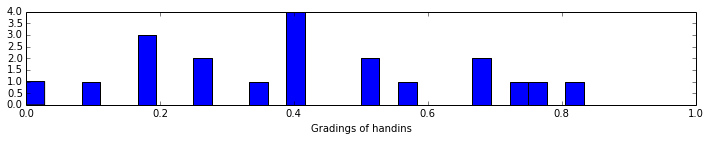

Deep Learning
570675bd39cbee0018808ed7
21


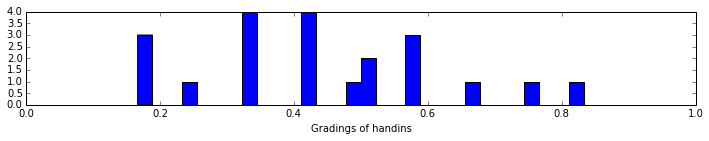

Cognitive Neural Networks
570675be39cbee0018808f8e
29


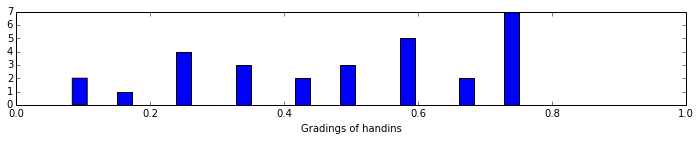

Temp: Den åbne...
570675d939cbee0018809074
0
Python and Fast Data
57068a472d9903000fd1c324
23


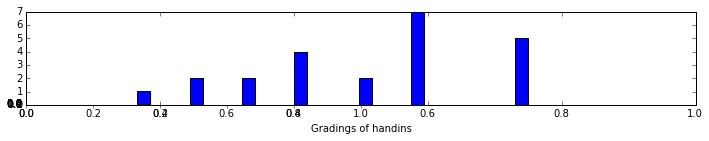

Big Data and Hadoop
57068a4a2d9903000fd1c3db
22


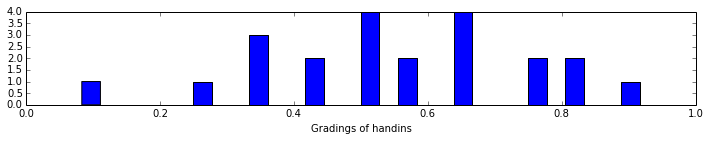

Large Scale Text Modelling
57068a4d2d9903000fd1c492
26


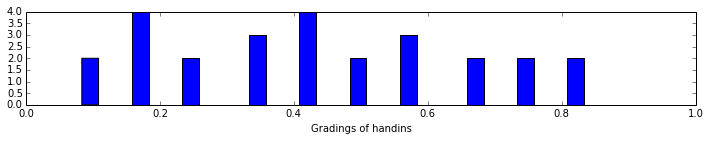

Deep Learning
57068a4d2d9903000fd1c561
21


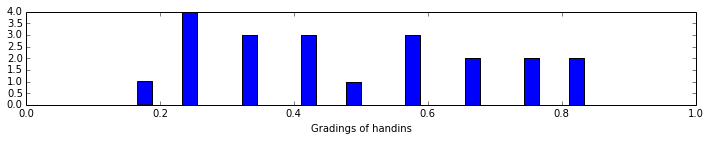

Cognitive Neural Networks
57068a502d9903000fd1c618
26


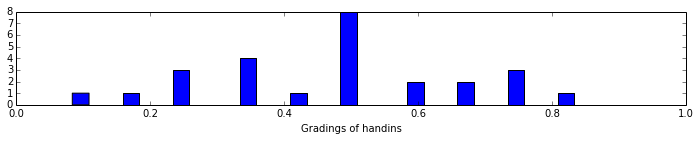

Homework 1
570690b53e88de000f9897f6
21


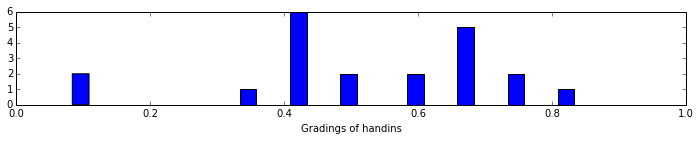

Homework 2
570690c03e88de000f9898ad
32


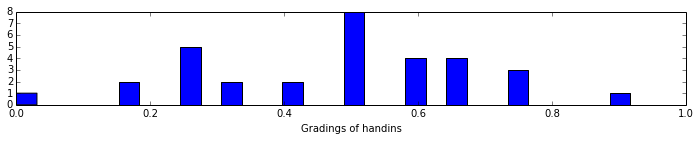

Homework 1
5706a3c48c8cab000f7b3da6
18


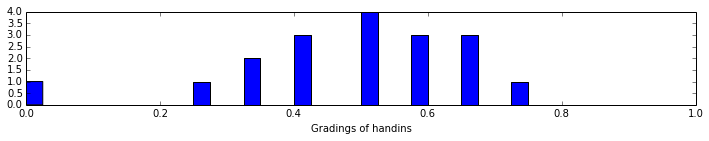

Homework 2
5706a3cc8c8cab000f7b3e4b
21


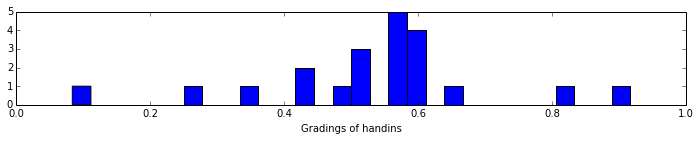

Homework 1
57070ec18c8cab000f7b3f50
22


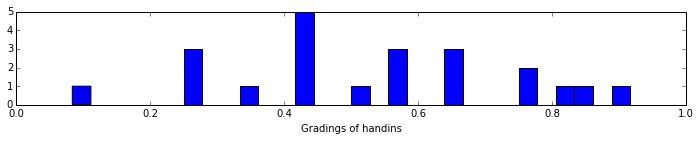

Homework 2
57070ece8c8cab000f7b4001
26


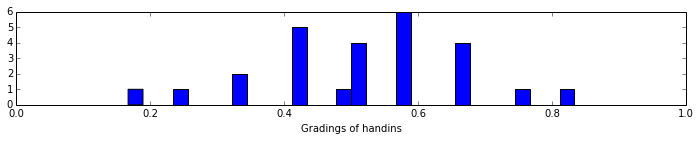

Homework 1
570748e58c8cab000f7b410c
18


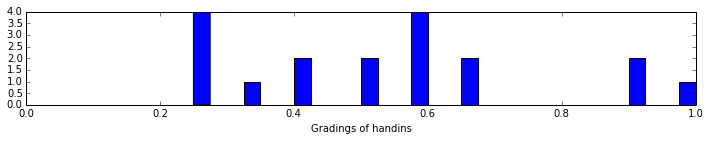

Homework 2
570748ec8c8cab000f7b41ab
25


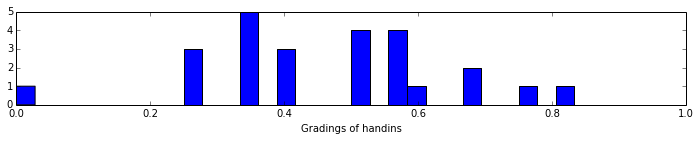

Homework 1
57074a9b8c8cab000f7b42b9
20


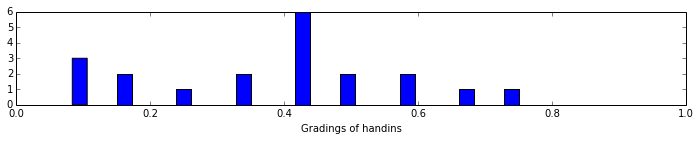

Homework 2
57074aa38c8cab000f7b4364
33


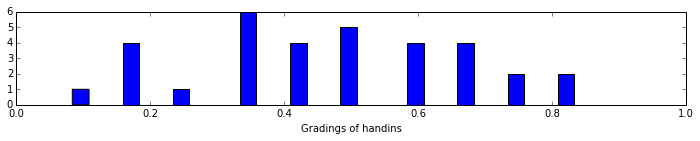

Homework 1
5707a1cb8c8cab000f7b4527
23


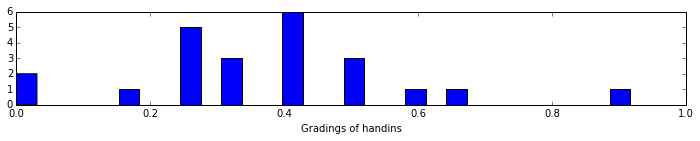

Homework 2
5707a1ce8c8cab000f7b45ea
33


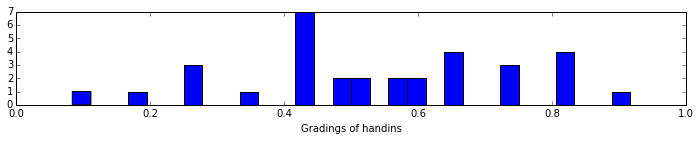

Pi-projekt
5707a3408c8cab000f7b46f0
60


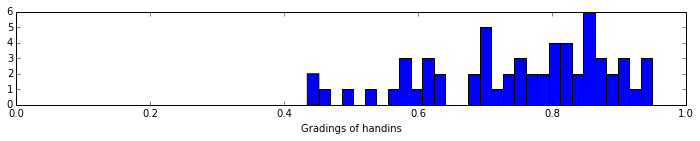

Homework 1
5707c0e38c8cab0018a108d1
19


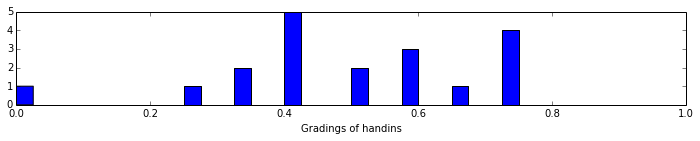

Homework 2
5707c0e88c8cab0018a10976
31


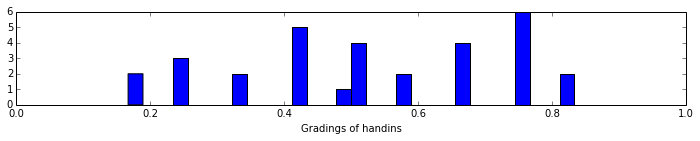

Homework 1
5709ff2e63cbf8000f9c65dd
20


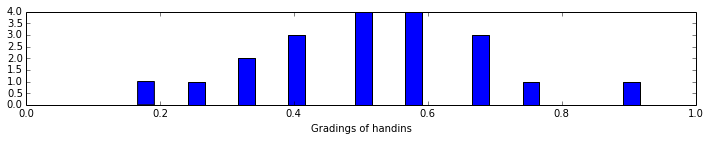

Homework 2
5709ff3263cbf8000f9c669a
31


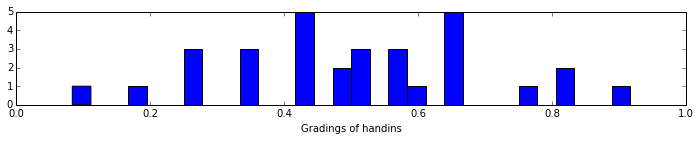

Uncertainty
570a98f363cbf8002136de79
684


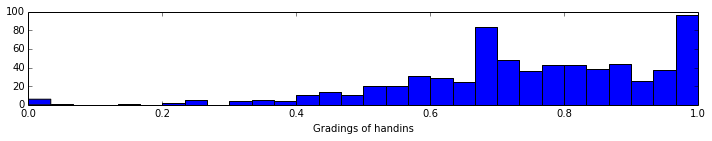

Homework 1
570b8fb74f22ee0018f06e13
22


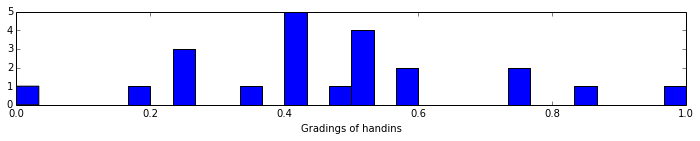

Homework 2
570b8fb94f22ee0018f06ed0
34


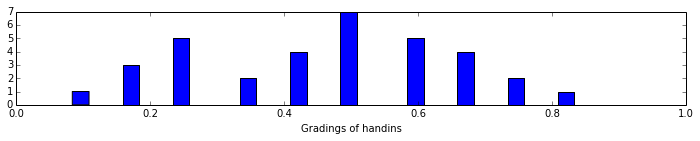

Skriveøvelse
570bab614f22ee0018f071f9
0
Opgave 4 - Arbejdsplanlægning
570bab864f22ee0018f071ff
60


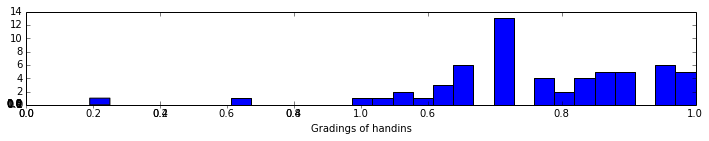

Homework 1
570bf65e4f22ee003267dd1c
25


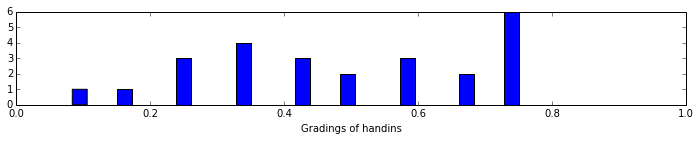

Homework 2
570bf6624f22ee003267dddf
34


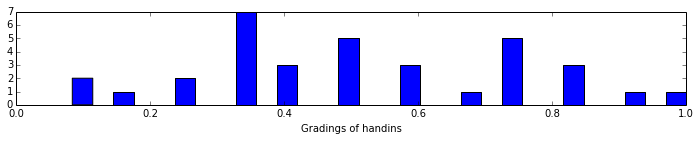

Homework 1
570bf85a4f22ee003267df12
17


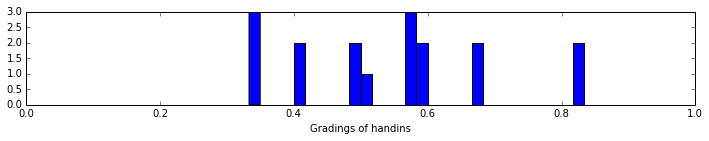

Homework 2
570bf85d4f22ee003267dfbd
28


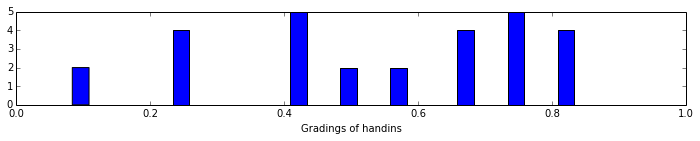

Homework 1
570c8ed14f22ee003267e192
23


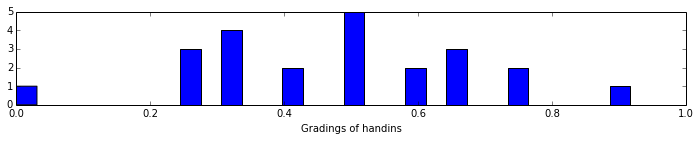

Homework 2
570c8ed44f22ee003267e261
27


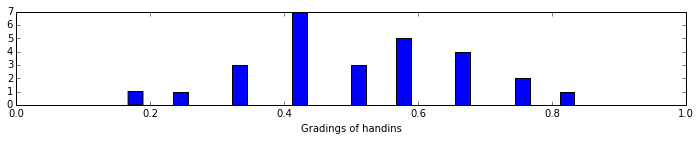

Vortrag
570c9e784f22ee003267e395
0
Assignment 2
570ca3f54f22ee003267e3af
60


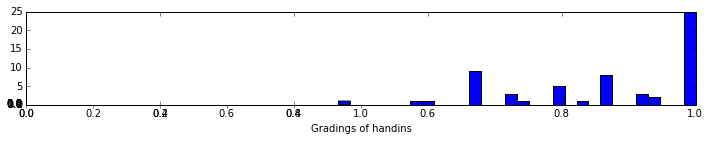

Homework 1
570cb7a34f22ee003267e428
23


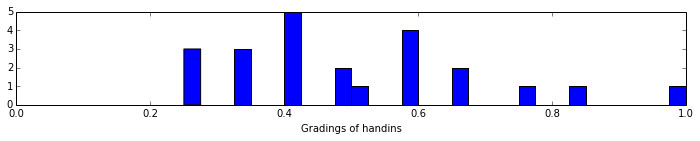

Homework 2
570cb7a64f22ee003267e4eb
28


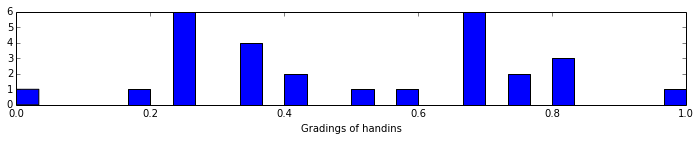

Innovationsoplæg - version 1
570e02d8e2e62b000f17ad15
0
Hjemmeopgave 16F-7
570f562cfab37f000fe31c2e
1


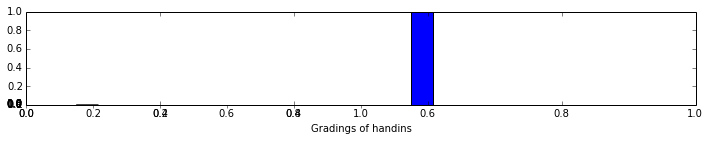

El cuarto misterioso EPISODIO 3: Oversættelse
570f5bb2fab37f000fe31c83
18


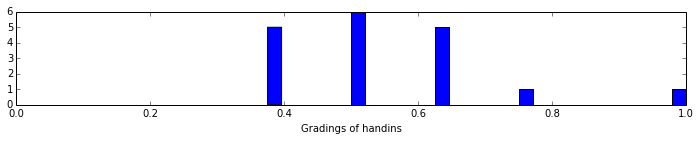

Structure/Table of Contents & Draft Introduction
5710f068f1b7f90021c173df
0
Homework 1
57122d9cc567d9000fc52eac
22


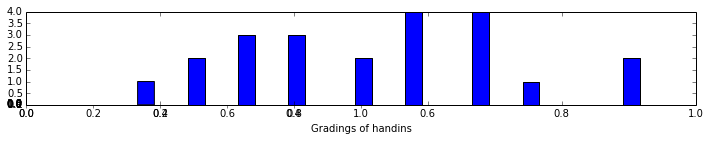

Homework 2
57122d9ec567d9000fc52f69
26


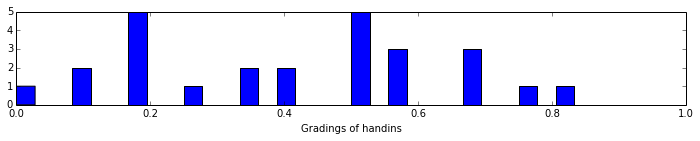

Peer Review Assignment 2 Resubmission
57124646c567d9000fc530c2
0
El cuarto misterioso 4
5713a0515484ca00205cebdf
0
Homework 1
5713ce1a5484ca00290eed49
22


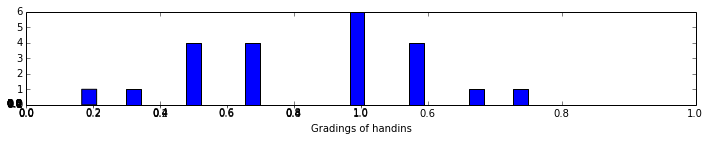

Homework 2
5713ce1c5484ca00290eee00
31


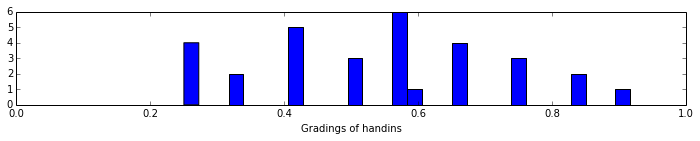

Project Assignment A
5713d9235484ca0032f341d2
221


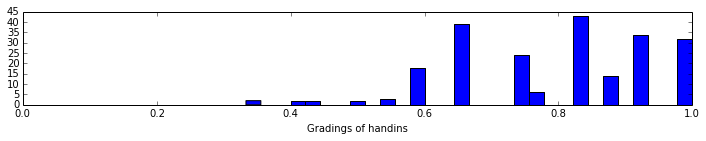

Hjemmeopgave 2
571489f88fcf2b00185d4d0c
50


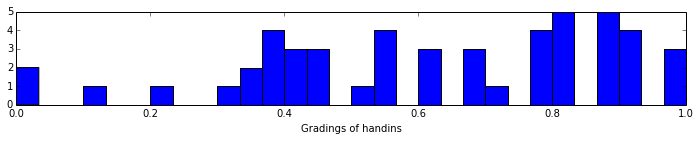

System Description Report
5714e58e8fcf2b00185d54a5
40


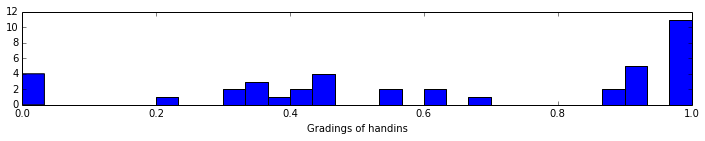

Homework 1
5714ebdc8fcf2b00185d54f0
21


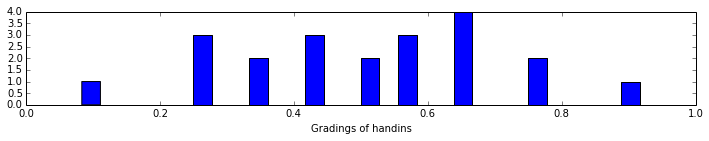

Homework 2
5714ebe08fcf2b00185d559b
33


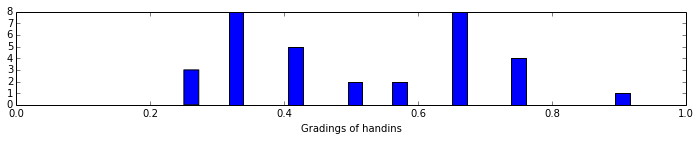

Homework 1
5714f84e8fcf2b00185d5705
18


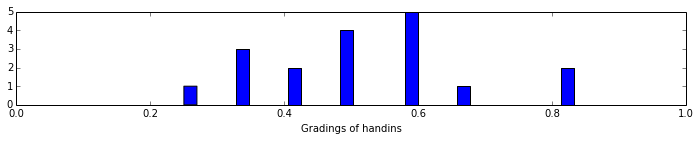

Homework 2
5714f8508fcf2b00185d57b6
24


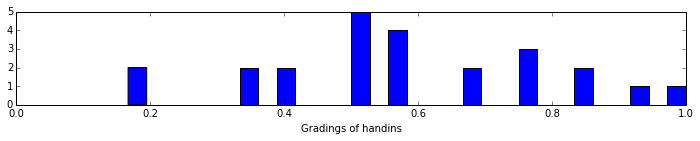

Mandatory Assignment 3 - Semantics
5714feb78fcf2b00185d58c8
0
Homework 1
571560218fcf2b00185d5ac6
19


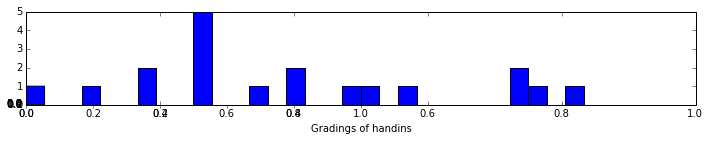

Homework 2
571560228fcf2b00185d5b71
33


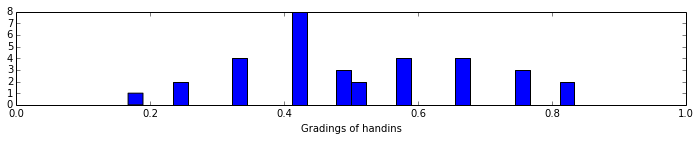

Projektrelateret aflevering (1) - mundtlig pitch
5715e073ff08ed003c370052
0
Homework 1
5715ed71ff08ed004581f9fa
18


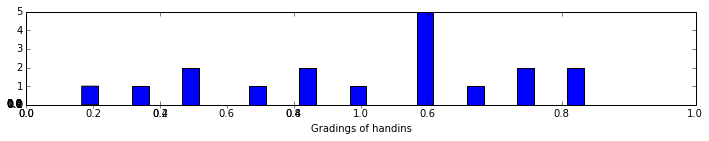

Homework 2
5715ed77ff08ed004581fa99
26


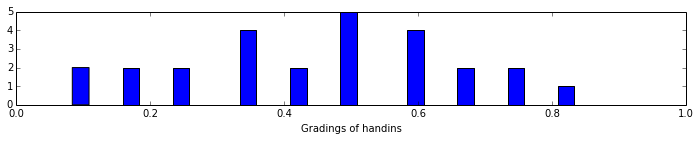

Homework 1
5715ef9dff08ed004581fb9a
17


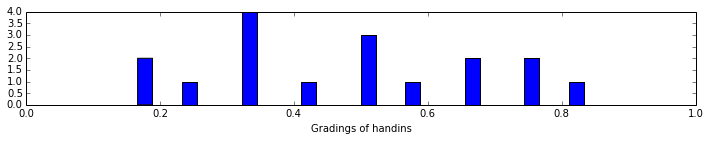

Homework 2
5715efa1ff08ed004581fc3f
28


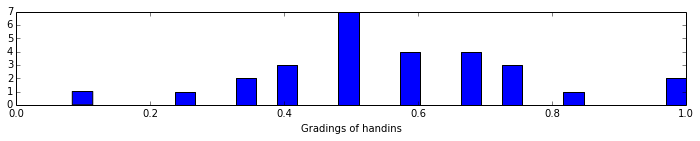

Abstract
571686614fe02300180f33fa
51


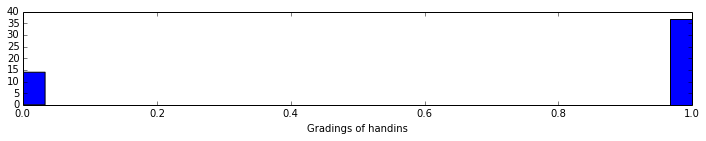

Lettere a "Famiglia Cristiana"
571698444fe02300180f3568
0
Protein phylogeny, Bayesian analysis, ancestral reconstruction - evolution of steroid receptors
5716da2d4fe02300180f381e
0
Digtial kultur F2016: Portfolio 2 (PF2)
571882ddbae052000f511c7b
68


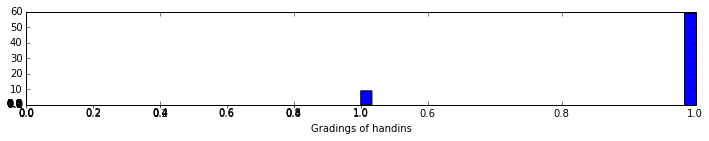

Peer review of the free assignment
5718c1e3bae052000f511ee2
0
Human Behavior
57193720ced35d000fe989c8
678


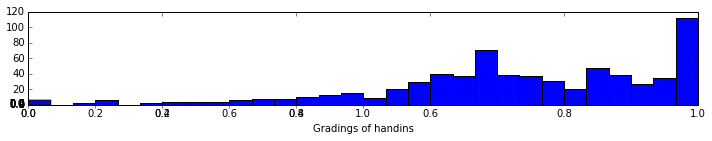

Skriftelige opgave om Peergrade.io
571db8f8496411000f299cfa
1


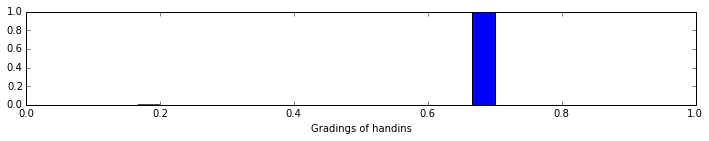

English Essay 1.b. - A Horse and Two Goats
571ddcf57b3843000fa7fabe
0
Hansens have
571dec9d7b3843000fa7fd39
0
Vektorfelter
571e19445fb76c000fde7760
72


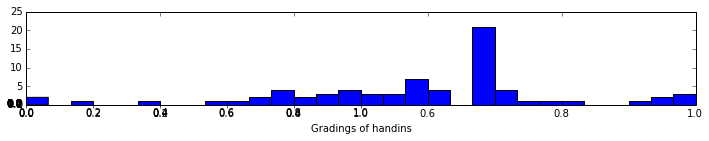

Prøve
571f19cd5fb76c00334463ad
0
My first assignment
571f3adb5fb76c0033446785
0
Opgave 5 - Åben Øvelse
5720c6c9a0c75d000f4d8762
0
Titel
5720d87aa0c75d000f4d87ae
0
Hjemmeopgave 16F-8
57213312a0c75d000f4d88de
0
Homework 5
572187e3a0c75d000f4d8912
0
Udkast til skriveøvelse
5721bfd8a0c75d001841cde1
0
Homework 1
5721fae6a0c75d002a92efd2
22


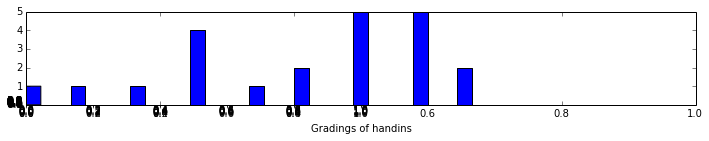

Homework 2
5721faeaa0c75d002a92f095
31


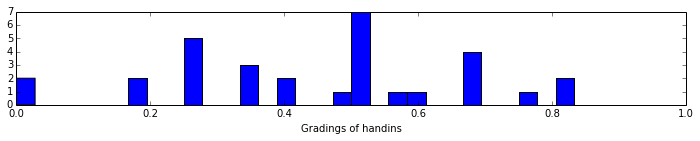

Homework 1
57220d03a0c75d002a92f258
21


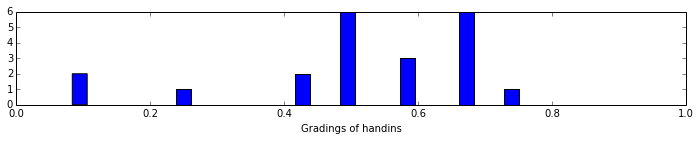

Homework 2
57220d04a0c75d002a92f303
33


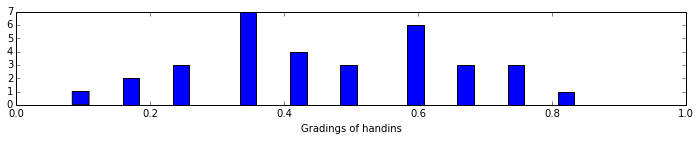

Homework 1
572212fee1ea1f000f6b7b58
23


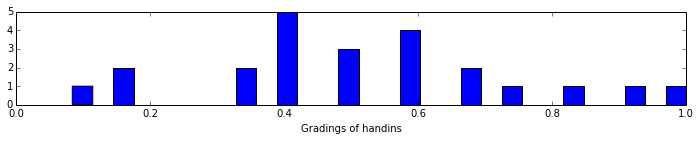

Homework 2
57221307e1ea1f000f6b7c21
30


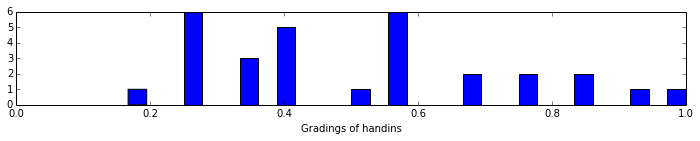

Homework 1
5724d7fbd674e3000fbbc32d
18


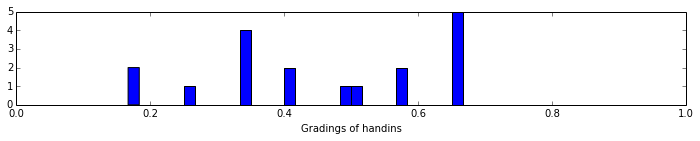

Homework 2
5724d7fcd674e3000fbbc3d2
26


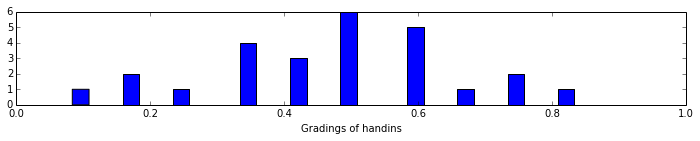

Elektriske felts arbejde
5725d601d674e300184aa932
0
Logbook Experiment 2
57265b602aa9fb000f7e39f9
0
Security Protocol Project
572663c22aa9fb000f7e3b03
0
Logbook Experiment 3
572674e62aa9fb0045799fbc
0
DHO problemformuleringer mv
5726f2702aa9fb004579a3c0
0
Indledning til DHO første udkast
5726f9a92aa9fb004579a537
0
Homework 1
57271ff72aa9fb006040135c
20


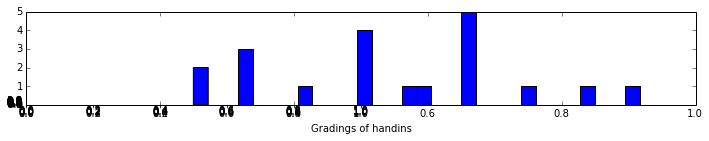

Homework 2
57271ff92aa9fb006040140d
23


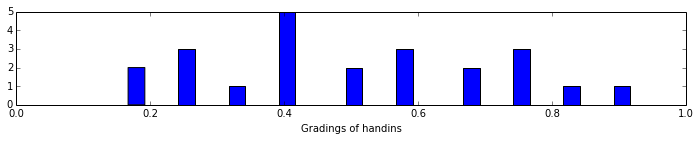

Konflikten i Syrien
572750eb2aa9fb00604019b4
0


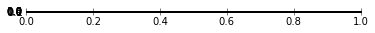

In [44]:
ass = list()
for a in data_model.Assignment.objects(closed=True):
    ass.append((a.id,a.title))
hist_grading(ass)

In [63]:
def handins_gradings_ass(ass_id):
    real_data = assignment_handins(ass_id)

    values = list()
    labels = list()

    for scores, handin_id in real_data:
        v = map(lambda x: x[0],scores)
        values.extend(v)
    if values != None and len(values) > 0:
        plt.hist(values,bins = 30,alpha = 0.65, color = "#348ABD",linewidth=0)

        plt.xlim(0,1)

In [68]:
from matplotlib.backends.backend_pdf import PdfPages

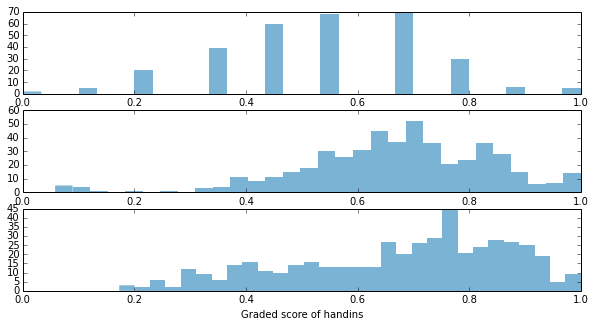

In [70]:
with PdfPages("../MasterThesis/Thesis/figures/Bayesian/" + "ObservedData.pdf") as pdf:
    fig = plt.figure(figsize(10,5))
    figsize(10,5)
    plt.subplot(3,1,1)
    handins_gradings_ass("568a8417fa7a25000ff2eaa6")
    plt.subplot(3,1,2)
    handins_gradings_ass("55f7cd326e34ab000b4bc376")
    plt.subplot(3,1,3)
    handins_gradings_ass("55f277cff3bd61000a2112d4")
    plt.xlabel('Graded score of handins')
    plt.show()
    pdf.savefig(fig)

## Data Structure

In [ ]:
def random_limit(distribution):
    val = distribution.random()
    while val > 1 or val < 0:
        val = distribution.random()
    return val

In [ ]:
class grader(object):
    def __init__(self, name,bias_value):
        self.name = name
        self.handins = list()
        self.bias_value = bias_value
        
    def add_handin(self, handin):
        self.handins.append(handin)
                
    def grade_handins(self):
        for handin in self.handins:
            handin.add_gradeing(self,self.bias_value)

In [ ]:
class handin:
    def __init__(self,title,owner,true_value):
        self.title = title
        self.owner = owner
        self.gradeings = dict()
        self.graders = list()
        self.true_val = true_value
    
    def add_grader(self,grader):
        self.graders.append(grader)
    
    def add_gradeing(self,grader,bias):
        obs = pm.Normal('obs_generator',self.true_val+bias,100)
        self.gradeings[grader.name] = random_limit(obs)

In [ ]:
class assignment(object):
    
    def __init__(self, handins_input, graders_input):
        self.handins = dict()
        self.graders = dict()
        for handin in handins_input:
            self.handins[handin.title] = handin
        for grader in graders_input:
            self.graders[grader.name] = grader
    
    def add_handin(self, handin):
        self.handing[handin.title] = handin
        
    def add_grader(self, grader):
        self.graders[grader.title] = grader
    
    def find_ungraded_handin(self, grader):
        
        # sort the handins by the one with the least
        sorted_l = sorted(self.handins.values(),key=lambda x: len(x.graders))
        i = int(random.uniform(0,len(sorted_l)))
        #i = 0
        handin = sorted_l[i]
        #while handin in grader.handins or (handin.owner.name == grader.name):
        while(handin.owner.name == grader.name):
            #i += 1
            i = int(random.uniform(0,len(sorted_l)))
            handin = sorted_l[i]
        return handin
            
    def grade_handins(self,n_handins):
        # Distribute handins
        for i in xrange(0,n_handins):
            for grader in self.graders.itervalues():
                h = self.find_ungraded_handin(grader)
                h.add_grader(g)
                grader.add_handin(h)
                
        # grade handins
        for grader in self.graders.itervalues():
            grader.grade_handins()

## Generate Observed Data

In [ ]:
T_mu = pm.Normal('T_mu_generator',0.5,25)
B_mu = pm.Normal('B_mu_generator',0,100)
B_tau = pm.Gamma('B_tau_generator',50,0.1)

handins_data = list()
graders_data = list()

for i in xrange(0,50):
    B = pm.Normal('B_generator',B_mu.random(),B_tau.random())
    g = grader('grader_%i' % i,B.random())
    t_mu = random_limit(T_mu)
    T = pm.Normal('T_generator',t_mu,100)
    h = handin('handin_%i' % i, g, random_limit(T))
    graders_data.append(g)
    handins_data.append(h)
    
assignment_data_true = assignment(handins_data,graders_data)
assignment_data_true.grade_handins(5)

In [ ]:
T_mu = pm.Normal('T_mu_generator',0.5,25)
B_mu = pm.Normal('B_mu_generator',0,100)
B_tau = pm.Gamma('B_tau_generator',50,0.1)

handins_data = list()

for i in xrange(50,100):
    t_mu = random_limit(T_mu)
    T = pm.Normal('T_generator',t_mu,100)
    h = handin('handin_%i' % i, graders_data[i-50], random_limit(T))
    handins_data.append(h)
    
assignment_data_2 = assignment(handins_data,graders_data)
assignment_data_2.grade_handins(5)

In [ ]:
T_mu = pm.Normal('T_mu_generator',0.5,25)
B_mu = pm.Normal('B_mu_generator',0,100)
B_tau = pm.Gamma('B_tau_generator',50,0.1)

handins_data = list()

for i in xrange(100,150):
    t_mu = random_limit(T_mu)
    T = pm.Normal('T_generator',t_mu,100)
    h = handin('handin_%i' % i, graders_data[i-100], random_limit(T))
    handins_data.append(h)
    
assignment_data_3 = assignment(handins_data,graders_data)
assignment_data_3.grade_handins(5)

In [ ]:
ax = plt.subplot(111)

values = list()
labels = list()

for title, h in assignment_data_true.handins.iteritems():
    v = map(lambda x: float(x),h.gradeings.values())
    values.append(v)
    labels.append(title)
    
plt.boxplot(values,0, vert=False, labels=labels)

box = ax.get_position()
ax.set_position([box.x0, box.y0,
                 box.width*1.5, box.height*5])
plt.ylabel('Handins')
plt.xlabel('Gradings of handins')
plt.xlim(0,1)
plt.show()

Comparing this to the real data, we can see that the generated data have immitated the real data. So our model seems to be correct

In [ ]:
ax = plt.subplot(111)

values = list()
labels = list()

labels = list()

for y, g in enumerate(assignment_data_true.graders.itervalues()):
    x = g.bias_value
    plt.plot(x,y,'o')
    labels.append(g.name)

box = ax.get_position()
ax.set_position([box.x0, box.y0,
                 box.width*1.5, box.height*2])
pos = range(0,len(labels))
plt.yticks(pos,labels)
plt.vlines(0, 0, len(labels), color="k", linestyles="--", lw=1)
plt.ylabel('Grader')
plt.xlabel('Bias of grader')
plt.xlim(-0.15,0.15)
plt.show()

In [ ]:
ax = plt.subplot(111)

values = list()
labels = list()

labels = list()

for y, h in enumerate(assignment_data_true.handins.itervalues()):
    x = h.true_val
    plt.plot(x,y,'o')
    labels.append(h.title)

box = ax.get_position()
ax.set_position([box.x0, box.y0,
                 box.width*1.5, box.height*2])
pos = range(0,len(labels))
plt.yticks(pos,labels)
plt.vlines(0, 0, len(labels), color="k", linestyles="--", lw=1)
plt.ylabel('Handins')
plt.xlabel('Score of handins')
plt.xlim(0,1)
plt.show()

## Back Again

Now that we have the generated data, We should be able to go the ohter way back and end up with the same data that where set to proudce the data

So I first define the model in Pymc

In [ ]:
def handin_model(data):
    N_H = len(data)
    
    # Bias
    T = dict()
    B = dict()
    B_mu = dict()
    B_tau = dict()
    O = list()

    for h in range(0, N_H):
        h_id = data[h].title
        scores = data[h].gradeings.items()
        
        N_G = len(scores)
        T_mu = pm.Normal('T_mu_%s' % str(h_id),0.5,25)
        #T_tau = pm.Gamma('T_tau_%s' % str(h_id),10,0.1)
        T[h_id] = pm.Normal('T_%s' % str(h_id), mu=T_mu, tau=100)
        
        for g in range(0, N_G):
            (g_id,val) = scores[g]
            
            if g_id not in B:
                if g_id not in B_mu:
                    B_mu[g_id] = pm.Normal('B_mu_%s' % str(g_id),0,100)
                if g_id not in B_tau:
                    B_tau[g_id] = pm.Gamma('B_tau_%s' % str(g_id), 50, 0.1)
                B[g_id] = pm.Normal('B_%s' % str(g_id), mu=B_mu[g_id], tau=B_tau[g_id])
            O.append(pm.Normal('O_%(h)i_%(g)i' % {'h': h, 'g':g}, mu = T[h_id] + B[g_id], tau=100, observed=True, value=val))
        
            
    collection = [pm.Container(T),
                  pm.Container(O),
                  pm.Container(B)]
    
    model = pm.Model(collection)
    map_ = pm.MAP(model)
    map_.fit()
    return model

In [ ]:
def execute_model(model):
    mcmc = pm.MCMC(model)
    mcmc.sample(1500)
    return mcmc

The model samples from distribution which can very much lead to different result. So we run the model 3 times in order to get a more telling result

In [ ]:
values = assignment_data_true.handins.values()
values.extend(assignment_data_2.handins.values())
values.extend(assignment_data_3.handins.values())
model_back = handin_model(values)

In [ ]:
mcmc_back_1 = execute_model(model_back)

In [ ]:
mcmc_back_2 = execute_model(model_back)

In [ ]:
mcmc_back_3 = execute_model(model_back)

In [ ]:
mcmc_true = [mcmc_back_1,mcmc_back_2,mcmc_back_3]

In [ ]:
def find_bias(assignment,mcmc,f):
    bias_abs = list()
    for g in assignment.graders.keys():
        bias_mean = f(mcmc.trace('B_%s' % str(g))[:])
        bias_abs.append((bias_mean,g))
    return bias_abs

In [ ]:
def find_T(assignment,mcmc,f):
    bias = list()
    for h in assignment.handins.keys():
        bias_mean = f(mcmc.trace('T_%s' % str(h))[:])
        bias.append((bias_mean,h))
    return bias

In [ ]:
def plot_mean_var(ax,assignment_data,mcmc_handins,find,numpy_func):
    # find the mean bias of the two runs
    bias_abs_1 = find(assignment_data, mcmc_handins[0], numpy_func)
    bias_abs_2 = find(assignment_data, mcmc_handins[1], numpy_func)
    bias_abs_3 = find(assignment_data, mcmc_handins[2], numpy_func)

    # Generate dict of the found values in each run for each grader

    compared = defaultdict(list)
    collected = list()
    collected = bias_abs_1[:]
    collected.extend(bias_abs_2[:])
    collected.extend(bias_abs_3[:])

    for (value, _id) in collected:
        compared[_id].append(value)

    sorted_list = compared.items()
    sorted_list.sort(key=lambda x: np.mean(x[1][:]))

    labels = list()
    for (_id, value) in sorted_list:
        name = _id
        labels.append(name)

    values = map(lambda x: x[1], sorted_list)
    plt.boxplot(values,0, vert=False, labels=labels)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0,
                     box.width+0.45, box.height*2])
    plt.vlines(0, 0, 120, color="k", linestyles="--", lw=1)

    if find.func_name == "find_bias":
        plt.xlabel("%s value of the bias distributions of a grader" % numpy_func.func_name)
    else:
        plt.xlabel("%s value of the true score distributions of a grader" % numpy_func.func_name)

In [ ]:
ax = plt.subplot(191)
plot_mean_var(ax,assignment_data_true,mcmc_true,find_bias,np.mean)
ax = plt.subplot(199)
plot_mean_var(ax,assignment_data_true,mcmc_true,find_bias,np.var)
plt.show()

In [ ]:
ax = plt.subplot(191)
plot_mean_var(ax,assignment_data_true,mcmc_true,find_T,np.mean)
ax = plt.subplot(199)
plot_mean_var(ax,assignment_data_true,mcmc_true,find_T,np.var)
plt.show()

In [ ]:
def compare_to_generated(assignment_data,mcmc_handins,find):
    bias_abs_1 = find(assignment_data, mcmc_handins[0], np.mean)
    bias_abs_2 = find(assignment_data, mcmc_handins[1], np.mean)
    bias_abs_3 = find(assignment_data, mcmc_handins[2], np.mean)

    # Generate dict of the found values in each run for each grader
    compared = defaultdict(list)
    collected = list()
    collected = bias_abs_1[:]
    collected.extend(bias_abs_2[:])
    collected.extend(bias_abs_3[:])

    for (value, _id) in collected:
        compared[_id].append(value)
    
    sorted_list = list()
    if find.func_name == "find_bias":
        for _id, g in assignment_data.graders.iteritems():
            sorted_list.append((_id,g.bias_value))
    else:
        for _id, h in assignment_data.handins.iteritems():
            sorted_list.append((_id,h.true_val))
    sorted_list.sort(key=lambda x: x[1])

    ax = plt.subplot(111)
    
    labels = list()
    true_values = list()
    score_values = list()
    mean_score_values = list()
    MS_val = list()
    y = xrange(0,len(sorted_list))
    for (_id, value) in sorted_list:
        if find.func_name != "find_bias":
            mean_score = np.mean(assignment_data.handins[_id].gradeings.values())
            mean_score_values.append(mean_score)
        MS_val.append(np.mean(compared[_id]))
        score_values.append(compared[_id])
        true_values.append(value)
        labels.append(_id)
    MSE_T = 0.0
    MSE_B = sum(map(lambda x : (float(x[1]) - float(x[0])) ** 2,zip(true_values,MS_val))) / len(true_values)
    print MSE_B
    if find.func_name != "find_bias":
        MSE_T = sum(map(lambda x : (float(x[1]) - float(x[0])) ** 2,zip(true_values,mean_score_values))) / len(true_values)
        print MSE_T
    box_text = ""
    if find.func_name != "find_bias":
        box_text = 'MSE model: %(h)f\nMSE graded: %(g)f' % {'h': MSE_B, 'g':MSE_T}
    else:
        box_text = "MSE: %f" % MSE_B
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.95, box_text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    y_ = map(lambda x: [x,x,x],y)
    if find.func_name == "find_bias":
        plt.plot(score_values,y_,'or',label="Pymc found bias",alpha=0.65)
        plt.plot(true_values,y,'ob',label="True bias",alpha=0.65)
    else:
        plt.plot(score_values,y,'or',label="Pymc found handin score",alpha=0.65)
        plt.plot(mean_score_values,y,'og',label="Mean of handin scores",alpha=0.65)
        plt.plot(true_values,y,'ob',label="True handin score",alpha=0.65)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0,
                     box.width+0.45, box.height*2])
    plt.yticks(xrange(0,len(sorted_list)),labels)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.99))
    if find.func_name == "find_bias":
        plt.xlabel("True graders bias compared to the found bias through pymc")
        plt.ylabel("Graders")
    else:
        plt.xlabel("True handin score compared to the found handin score through pymc")
        plt.ylabel("Handins")

In [ ]:
compare_to_generated(assignment_data_true,mcmc_true,find_bias)

In [ ]:
compare_to_generated(assignment_data_true,mcmc_true,find_T)